In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

## Carregar Dataset e Setup

In [250]:
# Carregar dataset
df = pd.read_csv("Data/group_22.csv")

# Mostrar tipo de dados para cada coluna
print("Tipos de dados por coluna:\n")
for col, dtype in df.dtypes.items():
    print(f"{col}: {dtype}")

Tipos de dados por coluna:

duration_1: float64
duration_2: float64
duration_3: float64
duration_4: float64
duration_5: float64
loudness_level: float64
popularity_level: float64
tempo_class: float64
time_signature: float64
key_mode: float64
artist_song_count: float64
album_freq: float64
movement_index: float64
intensity_level: float64
verbal_density: float64
purity_score: float64
positivity_index: float64
activity_rate: float64
loudness_intensity: float64
happy_dance: float64
acoustics_instrumental: float64
artists_avg_popularity: float64
tempo_vs_genre: float64
energy_rank_pct: float64
loud_energy_ratio: float64
mood_pca: float64
mood_cluster: float64
acoustic_valence_mood_cluster: float64
explicit: float64
signal_strength: float64
mode_indicator: float64
focus_factor: object
ambient_level: float64
key_sin: float64
key_cos: float64
duration_log: float64
duration_log_z: float64
time_signature_class_boolean: float64
loudness_yeo: float64
is_instrumental: float64
is_dance_hit: float64
te

Após verificar o **conjunto de tipo de dados obtidos**, observou-se que as variáveis **"focus_factor"** e **"target_class"** eram do tipo **object**. 
Com o objetivo de **alargar o conjunto de dados utilizados**, foi então possível observar que, para a variável **"focus_factor"**, existiam dados mal formatados no dataset, possuindo **vírgulas** em vez de **pontos** para referenciar as casas décimais.
Assim sendo, foi possível tratar essa coluna de dados, de modo a torná-los **numéricos**.

In [251]:
# Substituir vírgulas por pontos e converter para float
df['focus_factor'] = df['focus_factor'].astype(str).str.replace(',', '.', regex=False)
df['focus_factor'] = df['focus_factor'].astype(float)

# Confirmar a conversão
print("focus_factor é do tipo:", df['focus_factor'].dtype)


focus_factor é do tipo: float64


In [252]:
df.info

<bound method DataFrame.info of       duration_1  duration_2  duration_3  duration_4  duration_5  \
0            0.0         0.0         1.0         0.0         0.0   
1            0.0         0.0         0.0         1.0         0.0   
2            0.0         0.0         1.0         0.0         0.0   
3            0.0         0.0         1.0         0.0         0.0   
4            0.0         0.0         1.0         0.0         0.0   
...          ...         ...         ...         ...         ...   
2995         0.0         0.0         1.0         0.0         0.0   
2996         0.0         0.0         1.0         0.0         0.0   
2997         1.0         0.0         0.0         0.0         0.0   
2998         1.0         0.0         0.0         0.0         0.0   
2999         0.0         1.0         0.0         0.0         0.0   

      loudness_level  popularity_level  tempo_class  time_signature  key_mode  \
0                1.0               0.0          1.0        0.221824 -1

In [253]:
cont_cols = [
    "duration_log_z", "loudness_yeo", "temp_zscore", "energy_rank_pct", "mood_pca",
    "artists_avg_popularity", "movement_index", "intensity_level", "verbal_density",
    "positivity_index", "signal_power", "tempo_vs_genre", "time_signature",
    "focus_factor", "mood_cluster", "acoustic_valence_mood_cluster", "key_mode"
]

cat_cols = [
    'duration_1', 'duration_2', 'duration_3', 'duration_4', 'duration_5',
    'loudness_level', 'popularity_level', 'tempo_class', 'explicit',
    'mode_indicator', 'time_signature_class_boolean', 'is_instrumental',
    'is_dance_hit', 'echo_constant', 'target_class'
]


# snapshot das colunas numéricas
num_df   = df.select_dtypes(include=[np.number]).copy()
num_cols = num_df.columns

#colunas alvo
targets   = ["target_class", "target_regression"]

# Dataframe para tendência central
central_tendency = pd.DataFrame(index=num_cols)

# DataFrame de para disperção
disp = pd.DataFrame(index=num_cols)

# 1. Análise Exploratória de Dados

**Objetivo.** Resumir o dataset em três frentes:


## 1.1 Análise Descritiva

### 1.1.1 Tendência central
*média*, *mediana*, *moda* 

In [254]:
# media e mediana e moda por coluna
central_tendency["mean"] = df[num_cols].mean()
central_tendency["median"] = df[num_cols].median()
central_tendency["mode"] = df[num_cols].mode(dropna=True).iloc[0]
central_tendency


,mean,median,mode
duration_1,6.733333e-02,0.000000e+00,0.000000
duration_2,1.713333e-01,0.000000e+00,0.000000
duration_3,3.190000e-01,0.000000e+00,0.000000
duration_4,4.263333e-01,0.000000e+00,0.000000
duration_5,1.600000e-02,0.000000e+00,0.000000
loudness_level,1.714000e+00,2.000000e+00,2.000000
popularity_level,2.043000e+00,2.000000e+00,3.000000
tempo_class,1.018000e+00,1.000000e+00,1.000000
time_signature,7.697062e-02,2.218242e-01,0.221824
key_mode,-1.977656e-02,-7.678645e-02,0.485996


### 1.1.2 Disperção

#### 1.1.2.1 Min e Max
  
Valores mínimo e máximo observados por coluna. Úteis para perceber limites mas sensíveis a outliers.


In [255]:
disp["min"]=df[num_cols].min()
disp["max"]=df[num_cols].max()
disp

,min,max
duration_1,0.000000,1.000000
duration_2,0.000000,1.000000
duration_3,0.000000,1.000000
duration_4,0.000000,1.000000
duration_5,0.000000,1.000000
loudness_level,0.000000,4.000000
popularity_level,0.000000,4.000000
tempo_class,0.000000,3.000000
time_signature,-6.712656,2.533318
key_mode,-1.511882,1.611562


#### 1.1.2.2 Amplitude

Amplitude total dos dados. Muito simples e muito sensível a outliers. `Amplitude = max - min` 


In [256]:
disp["range"]= disp["max"] - disp["min"]
disp

,min,max,range
duration_1,0.000000,1.000000,1.000000
duration_2,0.000000,1.000000,1.000000
duration_3,0.000000,1.000000,1.000000
duration_4,0.000000,1.000000,1.000000
duration_5,0.000000,1.000000,1.000000
loudness_level,0.000000,4.000000,4.000000
popularity_level,0.000000,4.000000,4.000000
tempo_class,0.000000,3.000000,3.000000
time_signature,-6.712656,2.533318,9.245973
key_mode,-1.511882,1.611562,3.123444


#### 1.1.2.3 Variancia

Média do quadrado dos desvios à média; mede dispersão em unidades ao quadrado.  

Exemplo  
Dados: [2, 4, 4, 4, 5, 5, 7, 9]

Média \\(\bar{x}=5\\).  
Desvios: \\([-3,-1,-1,-1,0,0,2,4]\\).  
Quadrados: \\([9,1,1,1,0,0,4,16]\\). Soma \\(=32\\).

**Variância amostral:** \\(\frac{32}{7}\approx 4.5714\\) (correção de Bessel \\({N-1})\\)

In [257]:
disp["variance"]= df[num_cols].var()
disp

,min,max,range,variance
duration_1,0.000000,1.000000,1.000000,6.282050e-02
duration_2,0.000000,1.000000,1.000000,1.420256e-01
duration_3,0.000000,1.000000,1.000000,2.173114e-01
duration_4,0.000000,1.000000,1.000000,2.446548e-01
duration_5,0.000000,1.000000,1.000000,1.574925e-02
loudness_level,0.000000,4.000000,4.000000,1.816143e+00
popularity_level,0.000000,4.000000,4.000000,9.534688e-01
tempo_class,0.000000,3.000000,3.000000,6.102968e-02
time_signature,-6.712656,2.533318,9.245973,6.132580e-01
key_mode,-1.511882,1.611562,3.123444,1.010088e+00


#### 1.1.2.4 Desvio-Padrão

Mede a disperção média da média do dados.
Raiz quadrada da variância volta às mesmas unidades da variável.

Dados: `[2, 4, 4, 4, 5, 5, 7, 9]`  
Média \\(\bar{x}=5\\). Quadrados dos desvios somam **32**.
- **Variância amostral:** \\(32/7 \approx 4{,}5714\\)  
- **Desvio-padrão amostral:** \\(\sqrt{4{,}5714}\approx 2{,}138\\)


In [258]:
disp["std"]= df[num_cols].std()
disp

,min,max,range,variance,std
duration_1,0.000000,1.000000,1.000000,6.282050e-02,0.250640
duration_2,0.000000,1.000000,1.000000,1.420256e-01,0.376863
duration_3,0.000000,1.000000,1.000000,2.173114e-01,0.466167
duration_4,0.000000,1.000000,1.000000,2.446548e-01,0.494626
duration_5,0.000000,1.000000,1.000000,1.574925e-02,0.125496
loudness_level,0.000000,4.000000,4.000000,1.816143e+00,1.347643
popularity_level,0.000000,4.000000,4.000000,9.534688e-01,0.976457
tempo_class,0.000000,3.000000,3.000000,6.102968e-02,0.247042
time_signature,-6.712656,2.533318,9.245973,6.132580e-01,0.783108
key_mode,-1.511882,1.611562,3.123444,1.010088e+00,1.005031


#### 1.1.2.5 Quantis e Quartis

quantis dividem a distribuição em **frações**.  
O quantil de ordem \\(p\\) (com \\(0 \le p \le 1\\)) é o valor abaixo do qual está **p·100%** dos dados.

- **Mediana** = quantil **0.5** (50.º percentil).
- **Quartis:**  
  - \\(Q_1\\) = quantil **0.25** (25.º percentil)  
  - \\(Q_3\\) = quantil **0.75** (75.º percentil)

O intervalo entre \\(Q_1\\) e \\(Q_3\\) capta o “**miolo**” dos dados (50% central).

Os dados são colocados por ordem (do mais pequeno para o maior).  
No quantil 0.25 (25%), cerca de um quarto dos valores fica abaixo deste ponto.


In [259]:
disp["q1"]= df[num_cols].quantile(0.25)
disp["q2 (median)"]= df[num_cols].quantile(0.50)
disp["q3"] = df[num_cols].quantile(0.75)
disp

,min,max,range,variance,std,q1,q2 (median),q3
duration_1,0.000000,1.000000,1.000000,6.282050e-02,0.250640,0.000000,0.000000e+00,0.000000
duration_2,0.000000,1.000000,1.000000,1.420256e-01,0.376863,0.000000,0.000000e+00,0.000000
duration_3,0.000000,1.000000,1.000000,2.173114e-01,0.466167,0.000000,0.000000e+00,1.000000
duration_4,0.000000,1.000000,1.000000,2.446548e-01,0.494626,0.000000,0.000000e+00,1.000000
duration_5,0.000000,1.000000,1.000000,1.574925e-02,0.125496,0.000000,0.000000e+00,0.000000
loudness_level,0.000000,4.000000,4.000000,1.816143e+00,1.347643,1.000000,2.000000e+00,3.000000
popularity_level,0.000000,4.000000,4.000000,9.534688e-01,0.976457,1.000000,2.000000e+00,3.000000
tempo_class,0.000000,3.000000,3.000000,6.102968e-02,0.247042,1.000000,1.000000e+00,1.000000
time_signature,-6.712656,2.533318,9.245973,6.132580e-01,0.783108,0.221824,2.218242e-01,0.221824
key_mode,-1.511882,1.611562,3.123444,1.010088e+00,1.005031,-0.920961,-7.678645e-02,0.767388


#### 1.1.2.6 Intervalo Interquartil (Quartil Range)

**Definição:** \\( \mathrm{IQR} = Q_3 - Q_1 \\). Mede a **largura do miolo central (50%)** dos dados.  
É **robusto a outliers** (não depende de mínimos/máximos).

IQR **grande** ⇒ dados mais espalhados na parte central.
IQR **pequeno** ⇒ dados concentrados perto da mediana.

**Limites e Outliers:**
- Limite inferior: \\( \text{LI} = Q_1 - 1.5 \times \mathrm{IQR} \\)
- Limite superior: \\( \text{LS} = Q_3 + 1.5 \times \mathrm{IQR} \\)

Valores fora de \\([ \text{LI}, \text{LS} ]\\) são marcados como outliers.

In [260]:
# intervalo
disp["IQR"] = disp["q3"] - disp["q1"]

# limites
disp["LI"] = disp["q1"] - 1.5 * disp["IQR"]   # limite inferior
disp["LS"] = disp["q3"] + 1.5 * disp["IQR"]   # limite superior

# ouliers
mask_lower = num_df.lt(disp["LI"], axis=1)  # cada coluna compara com o seu LI
mask_upper = num_df.gt(disp["LS"], axis=1)  # idem para LS
disp["outlier %"] = (mask_lower | mask_upper).mean(axis=0) * 100  # % por coluna
disp

,min,max,range,variance,std,q1,q2 (median),q3,IQR,LI,LS,outlier %
duration_1,0.000000,1.000000,1.000000,6.282050e-02,0.250640,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.733333
duration_2,0.000000,1.000000,1.000000,1.420256e-01,0.376863,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,17.133333
duration_3,0.000000,1.000000,1.000000,2.173114e-01,0.466167,0.000000,0.000000e+00,1.000000,1.000000,-1.500000,2.500000,0.000000
duration_4,0.000000,1.000000,1.000000,2.446548e-01,0.494626,0.000000,0.000000e+00,1.000000,1.000000,-1.500000,2.500000,0.000000
duration_5,0.000000,1.000000,1.000000,1.574925e-02,0.125496,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.600000
loudness_level,0.000000,4.000000,4.000000,1.816143e+00,1.347643,1.000000,2.000000e+00,3.000000,2.000000,-2.000000,6.000000,0.000000
popularity_level,0.000000,4.000000,4.000000,9.534688e-01,0.976457,1.000000,2.000000e+00,3.000000,2.000000,-2.000000,6.000000,0.000000
tempo_class,0.000000,3.000000,3.000000,6.102968e-02,0.247042,1.000000,1.000000e+00,1.000000,0.000000,1.000000,1.000000,5.933333
time_signature,-6.712656,2.533318,9.245973,6.132580e-01,0.783108,0.221824,2.218242e-01,0.221824,0.000000,0.221824,0.221824,6.800000
key_mode,-1.511882,1.611562,3.123444,1.010088e+00,1.005031,-0.920961,-7.678645e-02,0.767388,1.688348,-3.453483,3.299910,0.000000


#### 1.1.2.7 Função MAD (Median Absolute Deviation)
Dispersão robusta, útil por ser pouco influenciada por valores extremos (`median(|x − median(x)|)`)  
Boa alternativa ao desvio padrão quando a distribuição é assimétrica ou com outliers.

In [261]:
disp["MAD"]= (num_df - num_df.median()).abs().median() # ou num_df.sub(num_df.median(), axis=1).abs().median() com axis para ficar explicito
disp

,min,max,range,variance,std,q1,q2 (median),q3,IQR,LI,LS,outlier %,MAD
duration_1,0.000000,1.000000,1.000000,6.282050e-02,0.250640,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.733333,0.000000
duration_2,0.000000,1.000000,1.000000,1.420256e-01,0.376863,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,17.133333,0.000000
duration_3,0.000000,1.000000,1.000000,2.173114e-01,0.466167,0.000000,0.000000e+00,1.000000,1.000000,-1.500000,2.500000,0.000000,0.000000
duration_4,0.000000,1.000000,1.000000,2.446548e-01,0.494626,0.000000,0.000000e+00,1.000000,1.000000,-1.500000,2.500000,0.000000,0.000000
duration_5,0.000000,1.000000,1.000000,1.574925e-02,0.125496,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.600000,0.000000
loudness_level,0.000000,4.000000,4.000000,1.816143e+00,1.347643,1.000000,2.000000e+00,3.000000,2.000000,-2.000000,6.000000,0.000000,1.000000
popularity_level,0.000000,4.000000,4.000000,9.534688e-01,0.976457,1.000000,2.000000e+00,3.000000,2.000000,-2.000000,6.000000,0.000000,1.000000
tempo_class,0.000000,3.000000,3.000000,6.102968e-02,0.247042,1.000000,1.000000e+00,1.000000,0.000000,1.000000,1.000000,5.933333,0.000000
time_signature,-6.712656,2.533318,9.245973,6.132580e-01,0.783108,0.221824,2.218242e-01,0.221824,0.000000,0.221824,0.221824,6.800000,0.000000
key_mode,-1.511882,1.611562,3.123444,1.010088e+00,1.005031,-0.920961,-7.678645e-02,0.767388,1.688348,-3.453483,3.299910,0.000000,0.844174


#### 1.1.2.8 Coeficiente de Variação

\\( \mathrm{CV} = \dfrac{\text{desvio-padrão}}{|\text{média}|} \\).

Mede variabilidade relativa, sem unidades. Isto permite comparar colunas em escalas diferentes.

In [262]:
disp["CV"] = disp["std"] / num_df.mean().abs()
disp

,min,max,range,variance,std,q1,q2 (median),q3,IQR,LI,LS,outlier %,MAD,CV
duration_1,0.000000,1.000000,1.000000,6.282050e-02,0.250640,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.733333,0.000000,3.722379e+00
duration_2,0.000000,1.000000,1.000000,1.420256e-01,0.376863,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,17.133333,0.000000,2.199588e+00
duration_3,0.000000,1.000000,1.000000,2.173114e-01,0.466167,0.000000,0.000000e+00,1.000000,1.000000,-1.500000,2.500000,0.000000,0.000000,1.461338e+00
duration_4,0.000000,1.000000,1.000000,2.446548e-01,0.494626,0.000000,0.000000e+00,1.000000,1.000000,-1.500000,2.500000,0.000000,0.000000,1.160186e+00
duration_5,0.000000,1.000000,1.000000,1.574925e-02,0.125496,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.600000,0.000000,7.843501e+00
loudness_level,0.000000,4.000000,4.000000,1.816143e+00,1.347643,1.000000,2.000000e+00,3.000000,2.000000,-2.000000,6.000000,0.000000,1.000000,7.862564e-01
popularity_level,0.000000,4.000000,4.000000,9.534688e-01,0.976457,1.000000,2.000000e+00,3.000000,2.000000,-2.000000,6.000000,0.000000,1.000000,4.779527e-01
tempo_class,0.000000,3.000000,3.000000,6.102968e-02,0.247042,1.000000,1.000000e+00,1.000000,0.000000,1.000000,1.000000,5.933333,0.000000,2.426737e-01
time_signature,-6.712656,2.533318,9.245973,6.132580e-01,0.783108,0.221824,2.218242e-01,0.221824,0.000000,0.221824,0.221824,6.800000,0.000000,1.017412e+01
key_mode,-1.511882,1.611562,3.123444,1.010088e+00,1.005031,-0.920961,-7.678645e-02,0.767388,1.688348,-3.453483,3.299910,0.000000,0.844174,5.081931e+01


## 1.2 Análise Univariate

Distribuição de cada variável de forma isolada:
- Numéricas: histograma + KDE, boxplot, quantis (Q1/Mediana/Q3).
- Categóricas: barras (Top-N) com contagens e percentagens.

Isto ajuda a detetar enviesamentos (skew), outliers, zeros estruturais, classes raras e necessidade de transformações/normalização.

### 1.2.1 Análise de colunas continuas

Para a análise de colunas continuas podemos usar Histogramas com KDE e Boxplot para visualizarmos o IQR e outliers.


In [263]:
def plot_univariate(df, col, bins=30, kde=True):
    s = df[col].copy()

    x = s.dropna().astype(float)

    # estatísticas
    count  = x.size
    mean   = x.mean()
    std    = x.std(ddof=1)
    q1, median, q3 = x.quantile([0.25,0.5,0.75])
    skew   = x.skew()
    kurt   = x.kurtosis()
    miss_p = 100 * (1 - len(x)/len(s)) if len(s) else 0.0

    stats_txt = (
        f"count: {count}\n"
        f"mean: {mean:.3f}\n"
        f"std: {std:.3f}\n"
        f"Q1: {q1:.3f}\n"
        f"median: {median:.3f}\n"
        f"Q3: {q3:.3f}\n"
        f"skew: {skew:.2f}\n"
        f"kurt: {kurt:.2f}\n"
    )

    # figura
    fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(9, 5.5), gridspec_kw={"height_ratios": [3, 1]}, sharex=False
    )

    # hist + KDE
    sns.histplot(x, bins=bins, kde=kde, ax=ax1)
    ax1.set(title=f"{col} — hist/KDE", ylabel="count")
    ax1.text(1.15, 0.98, stats_txt, transform=ax1.transAxes,
             ha="right", va="top", fontsize=9)

    # boxplot
    sns.boxplot(x=x, ax=ax2)
    ax2.set(title=f"{col} — boxplot", xlabel=col, ylabel="")

    plt.tight_layout()
    plt.show()


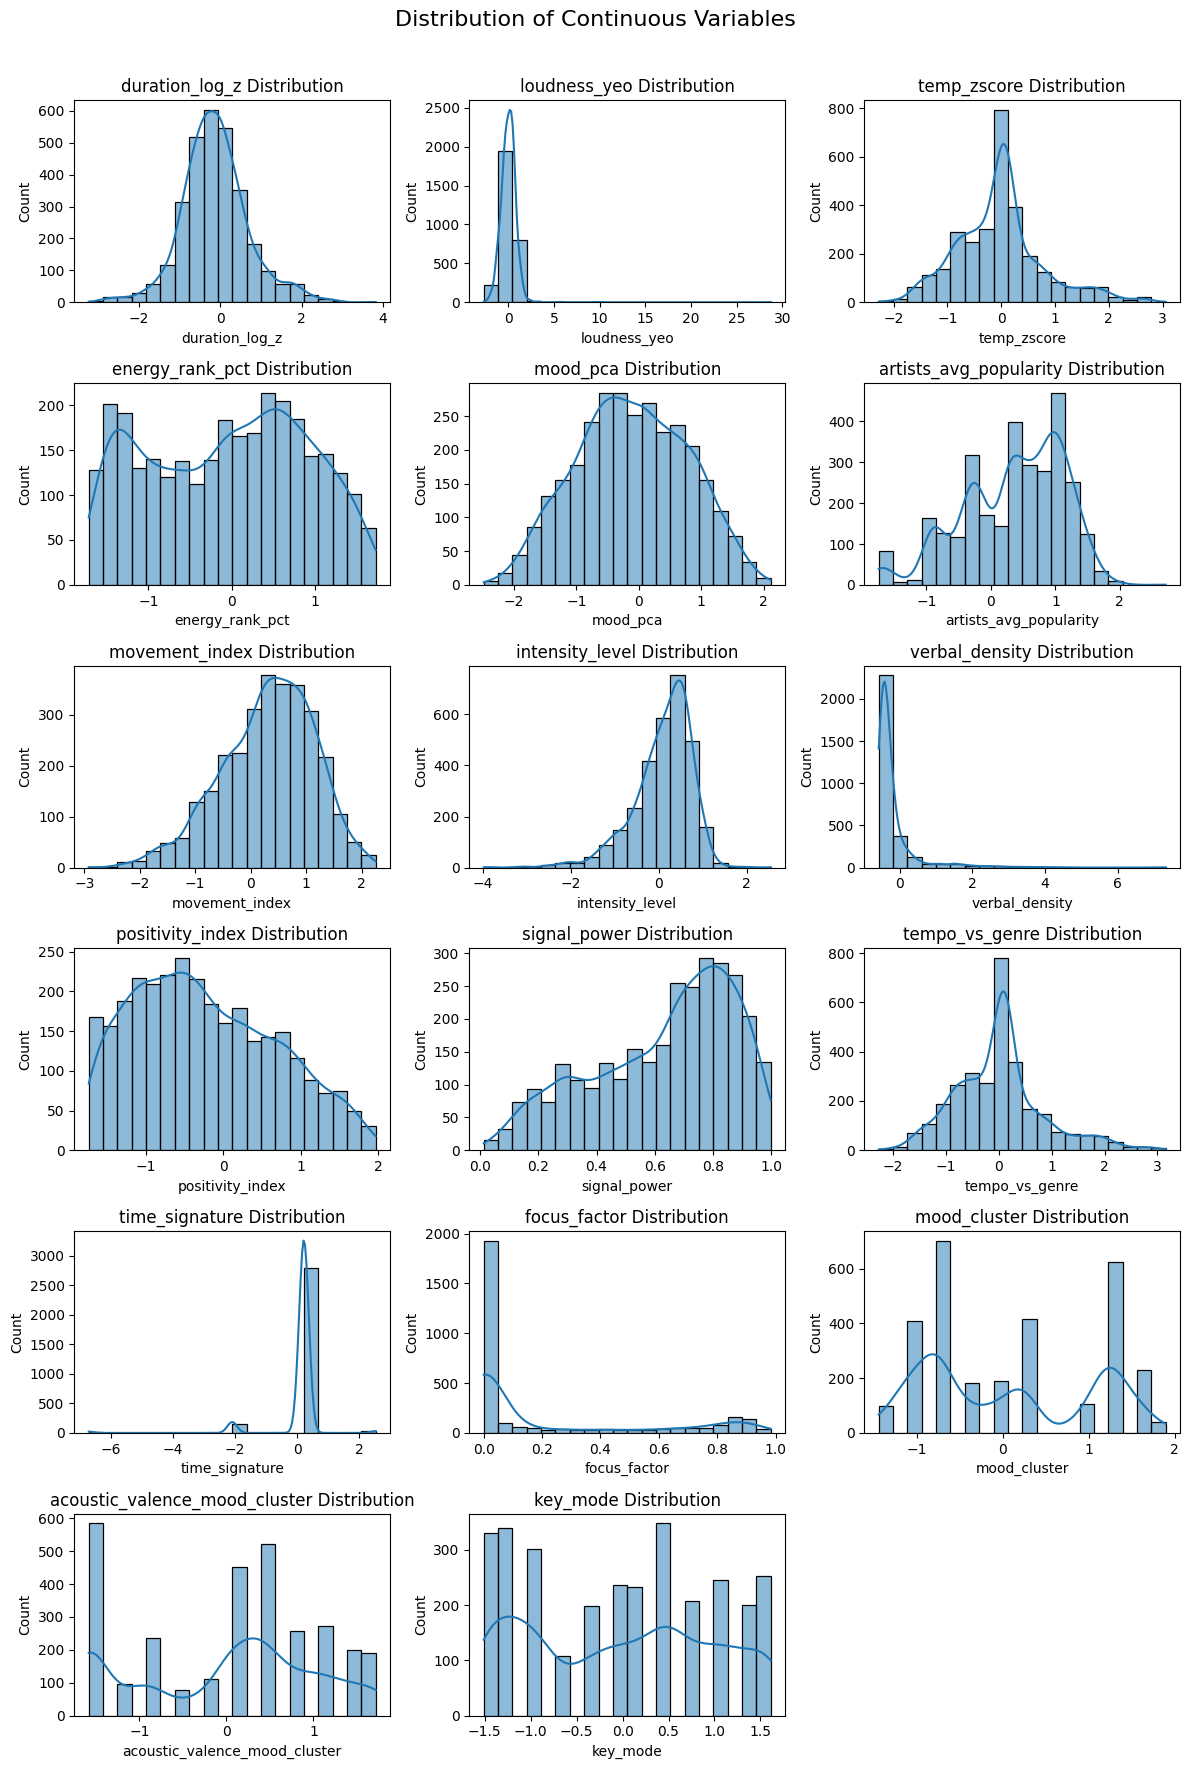

In [264]:
# Grid setup
n = len(cont_cols)
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows))
fig.suptitle('Distribution of Continuous Variables', fontsize=16)

# Flatten axes
axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Generate histograms
for i, col in enumerate(cont_cols):
    ax = axes_flat[i]
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'{col} Distribution')

# Hide unused axes if any
for j in range(len(cont_cols), len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

#### 1.2.1.1 duration_log_z

Uma vez que a duração já em log e normalizada (z-score); espera-se forma ~normal.  
**Observar:** simetria, caudas, outliers residuais.

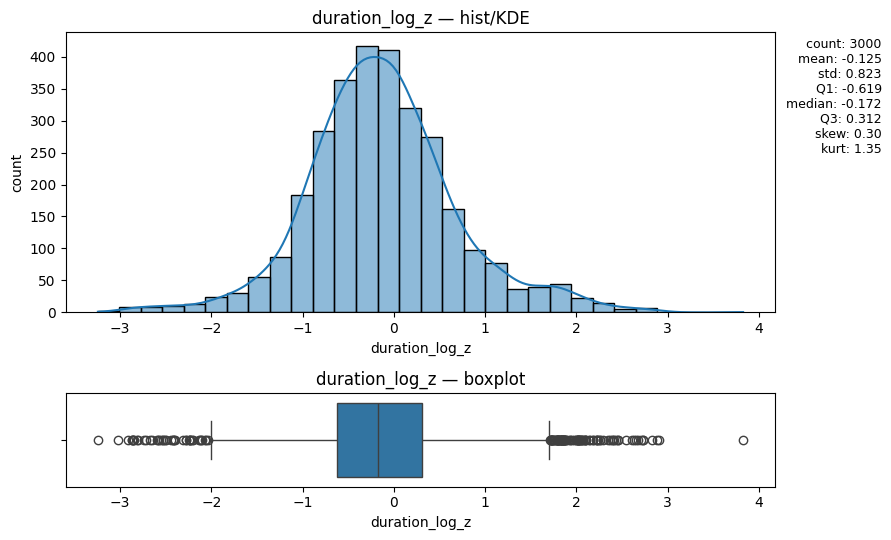

In [265]:
plot_univariate(df,"duration_log_z")

**skew** (assimetria) de 0.30 mostra uma ligeira cauda à direita mas é praticamente simétrico.
**kurt** (curtose) de 1.35 revela uma leptocúrtica moderada com caudas um ligeiramente mais pesadas que Normal (> 0).

**Média** de -0.125 maior que a mediana mediana mais uma vez mostrando-se consistente com a leve assimetria à direita.

O **histograma** está muito próximo de forma normal.  
O **Boxplot** revela um numero considerável de outliers em ambas as caudas.

#### 1.2.1.2 loudness_yeo

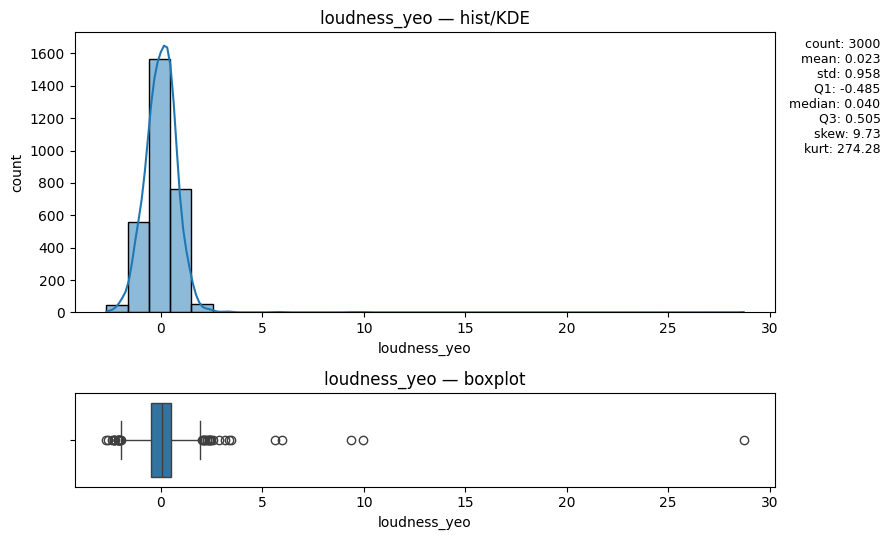

In [266]:
plot_univariate(df,"loudness_yeo")

**skew** (assimetria)  9,7 indica forte cauda à direita.
**kurt** (curtose) 274 indica caudas longas.

O **histograma** mostra que o miolo anda perto de 0, mas o eixo chega a ~30 por causa de outliers grandes.  
O **boxplot** confirma que há muitos pontos fora do intervalo interquartil, sobretudo à direita, confirmando assim o skew e o kurt.

#### 1.2.1.3 temp_zscore

`temp_zscore` é o tempo (BPM) normalizado:  
\\[
z = \frac{x - \text{média original}}{\text{desvio-padrão original}}
\\]
Depois desta conta, esperamos média ≈ 0 e desvio-padrão ≈ 1.

- O **histograma** espera-se estar centrado em 0 e sem caudas muito compridas.
- O **boxplot** não deve ter muitos pontos fora (outliers).
- A percentagem de valores extremos temos de analisar quantos têm |z| > 3 pois não é suposto estar muito longe do centro.

- A média deve andar perto de 0 e o desvio padrão perto de 1 (normalização).
- `skew` perto de 0 ou seja com uma distribuição simétrica.  
- Se `skew` estiver grande (>|1|) veremos uma cauda longa para um dos lados.
- **|z| > 3**:  
  - ≤ **1–2%** → normal, ignoro.  
  - > **2–3%** → muitos extremos; considerar tratar.


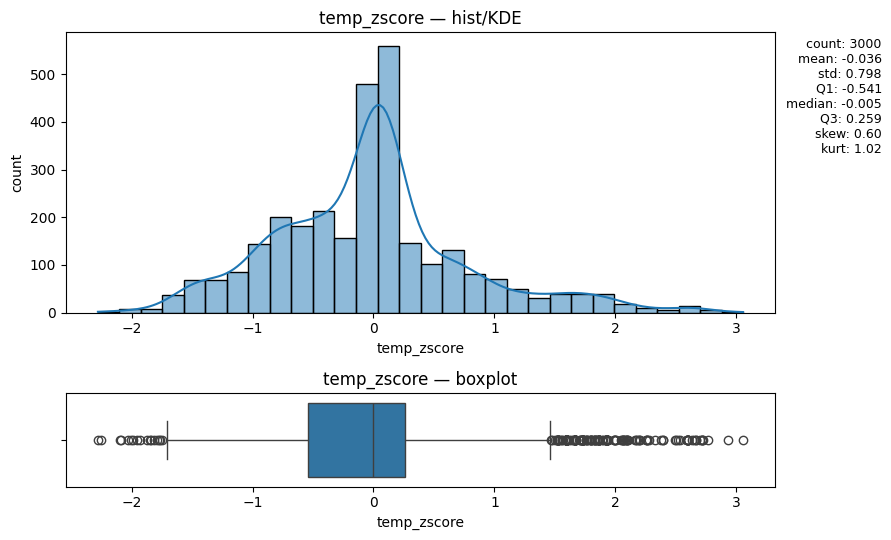

In [267]:
plot_univariate(df,"temp_zscore")

**Média** ≈ −0,036, centrado muito perto de 0 (ok para z-score).  
**Std** ≈ 0,798 (não exatamente 1), podemos considerar normal pode acontecer se o z-score foi calculado noutro conjunto (e aqui é um subconjunto), ou a diferença de definição (ddof=0 na normalização vs ddof=1 que o pandas usa para std amostral) ou até arredondamentos e transformações feitas à postriori.  
**Skew** ≈ 0,60, ligeira cauda à direita.  
**Kurt** ≈ 1,02, caudas mais pesadas do que a Normal o que revela alguns pontos extremos.  
**Boxplot** confirma a existencia de outliers em ambas as caudas, mais pronunciados à direita.  

A distribuição está centrada próximo de 0 (mean −0,036) com std ≈ 0,80, o que é compatível com um z-score.
bserva-se uma assimetria moderada à direita (skew 0,60) e caudas algo pesadas (kurt 1,02), refletidas em alguns outliers no boxplot.  

#### 1.2.1.3 energy_rank_pct

É o percentil do nível de energia da faixa em relação a um conjunto de músicas.  
Valores ~0 indicam energia mediana, negativos = abaixo da média e positivos = acima da média.  

Nesta analise espera se verificar se a distribuição é proxima de 0, se há poucos outliers e se o IQR dá a variabilidade central.


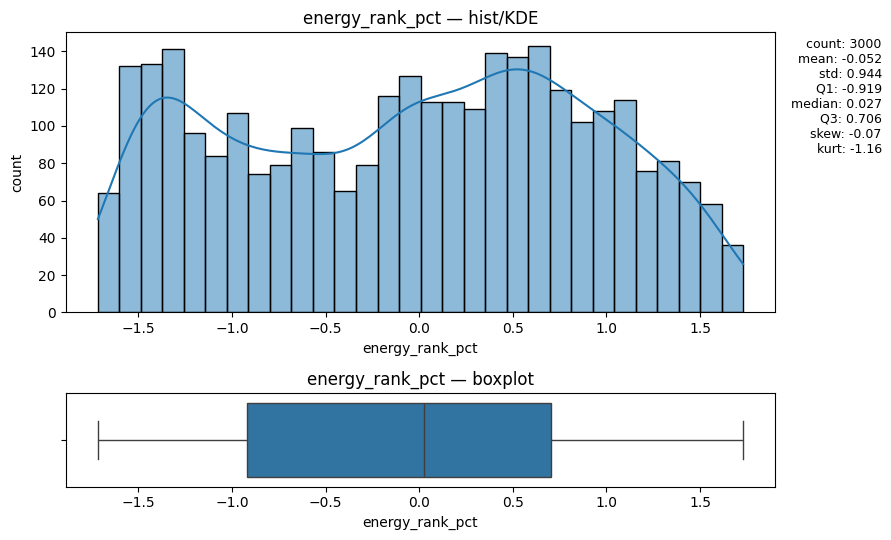

In [268]:
col = "energy_rank_pct"
plot_univariate(df,col)

A distribuição está próxima de simétrica (**skew** ≈ −0,07) e apresenta kurtose negativa (**kurt** ≈ −1,16), o que significa uma forma mais achatada e caudas mais leves do que a normal. O histograma sugere algo próximo de uniforme, sem picos acentuados. O boxplot mostra um **IQR** largo com uma variabilidade central elevada. As medidas centrais são coerentes com a **média** ≈ −0,05, o **desvio-padrão** ≈ 0,94, o **Q1** ≈ −0,92, a **mediana** ≈ 0,03 e o **Q3** ≈ 0,71.

Podemos então concluir que a a variável tem boa dispersão ao longo da faixa e não é dominada por extremos.
A uniformidade indica que os valores estão bem distribuídos e podem refletir diferentes perfis de energia sem concentração num intervalo estreito.
O facto de estar já centrada e escalada facilita o uso em modelos sensíveis à escala como regressões e SVM.

#### 1.2.1.5 mood_pca
Componente principal (PCA) que resume variação relacionada com “mood”. Por definição espera-se estar centrada (≈ média 0) e em escala contínua.
  
Espera-se que o **Histogram** seja aproximadamente simétrico se a projeção combinar vários fatores.  
É possível haver multimodalidade (picos múltiplos) se caso hajam subgrupos (géneros/estilos) distintos.  
O **Boxplot** pode ter alguns extremos, mas sem dominar a distribuição.

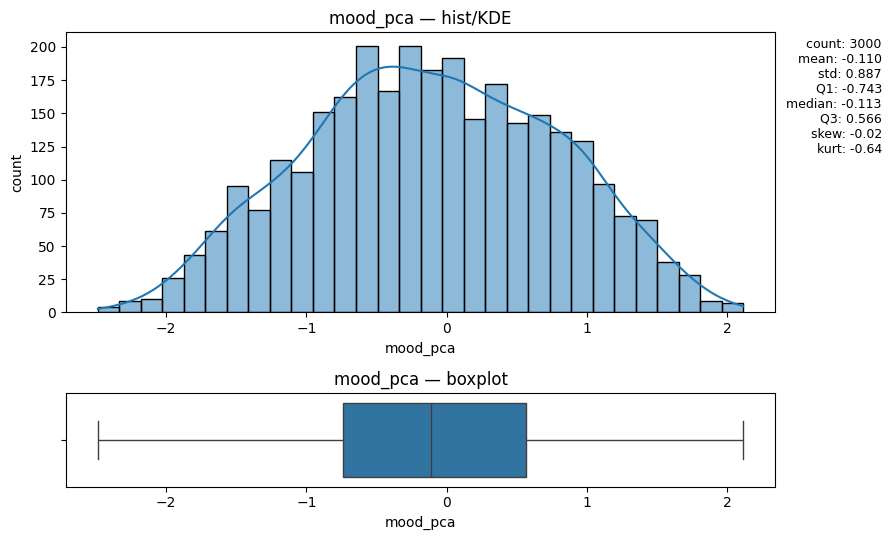

In [269]:
col = "mood_pca"
plot_univariate(df,col)

**Média** ≈ −0,11, **std** ≈ 0,89, centrada perto de 0 revelando uma dispersão moderada.  
**Q1** ≈ −0,743, **Med** ≈ −0,113, **Q3** ≈ 0,566, com **IQR** ≈ 1,309 (um miolo relativamente largo).  
**Skew** ≈ −0,02, distribuição praticamente simétrica.  
**Kurt** ≈ −0,64, um pouco mais “achatada” que a distribuição Normal com caudas ligeiramente leves.  
**Histograma** com perfil unimodal.  
**Boxplot** sem outliers e caudas equilibradas.

Com esta informação podemos ver que a projeção PCA captou uma dimensão de “estado de humor” com distribuição muito próxima de normal, sem assimetrias relevantes, com boa variabilidade no centro (IQR amplo) e ausência de extremos dominantes.

#### 1.2.1.6 artists_avg_popularity

Representa a popularidade média dos artistas da faixa. Espera-se ser assimétrica uma vez que por norma há muitos artistas pouco populares e poucos muito populares.

O **Histograma** vai ter muito provavelmente uma cauda à direita (skew>0).  
O **Boxplot** espera-se com alguns extremos altos.

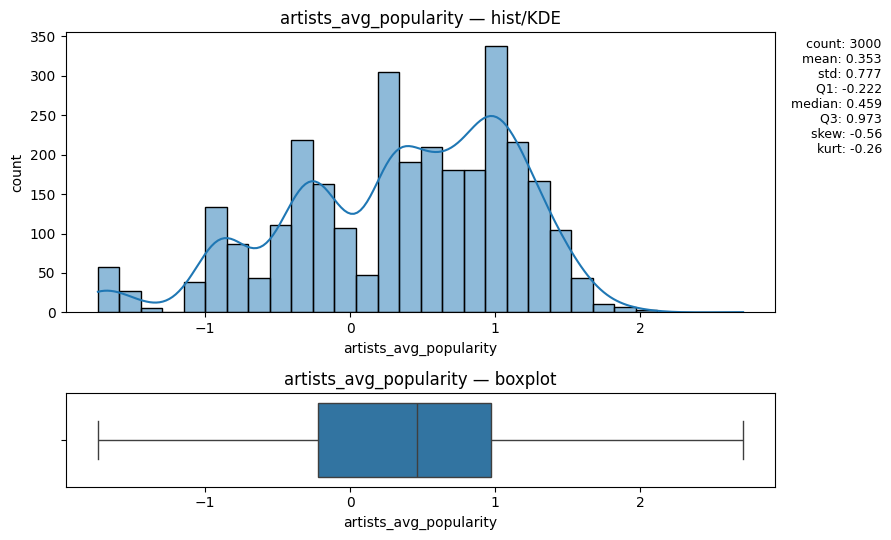

In [270]:
col = "artists_avg_popularity"
plot_univariate(df,col)

**mean** = 0,353 < **median** = 0,459 revela coerencia com assimetria à esquerda.  
**skew** ≈ −0,56, cauda mais longa para valores baixos revela artistas pouco populares.  
**kurt** ≈ −0,26, ligeiramente achatada.  
**Q1** = −0,222, **Q3** = 0,973 → **IQR** ≈ 1,195 (boa dispersão no miolo).  
**Boxplot**: alguns outliers em ambas as caudas, mais na esquerda.

A distribuição sugere muitos artistas com popularidade baixa e um grupo razoável com valores médios/altos; a densidade tem pequenas ondulações mostrando que pode haver subgrupos (género/época).

#### 1.2.1.7 movement_index

Feature derivada que mede a quantidade de mudança no padrão rítmico ao longo da faixa (maior = mais variação).

No **Histograma** espera se ver possivelmente uma cauda à direita uma vez que faixas com muita variação são menos comuns.  
No **Boxplot** espera-se evidenciar o IQR e eventuais extremos.

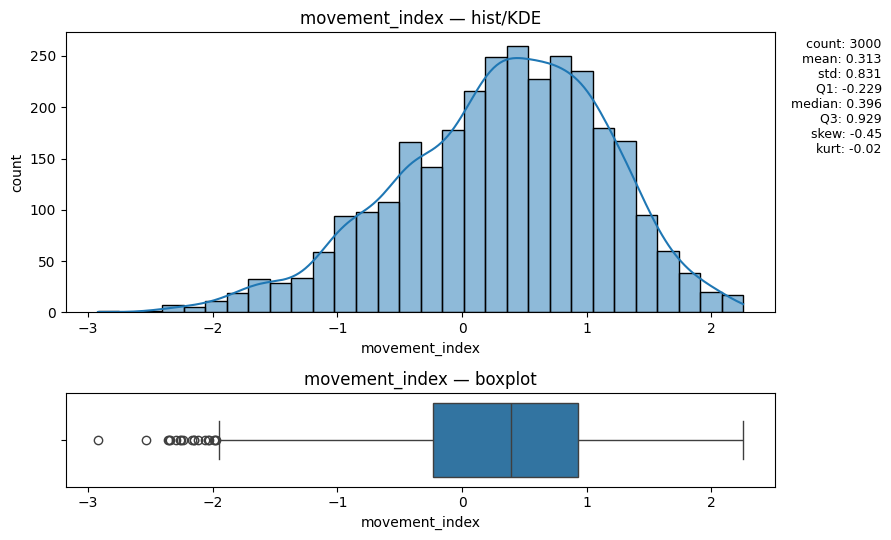

In [271]:
col="movement_index"
plot_univariate(df,col)

**mean** = 0,313 > **median** = 0,396, são próximos mas com ligeira assimetria à esquerda que é confirmada pelo **skew**≈ −0,45.  
**kurt** ≈ −0,02, muito perto da distribuição Normal sem caudas pesadas nem leves.  
**Q1** = −0,229, **Q3** = 0,929 → **IQR** ≈ 1,158 (boa dispersão central).  
**Boxplot**: vários outliers na cauda esquerda até cerca de −3, poucos na direita, até ≈ 2,3.  

Distribuição quase simétrica, com uma cauda à esquerda um pouco mais longa mostrando que há algumas faixas com pouca variação rítmica (valores negativos) e muitas com variação moderada/alta (miolo entre ~0 e ~1).

#### 1.2.1.8 intensity_level
  
Esta feature mede a intensidade/perceção de potência da faixa.  
É importante observar o **Boxplot** a mostrar IQR e eventuais extremos.  

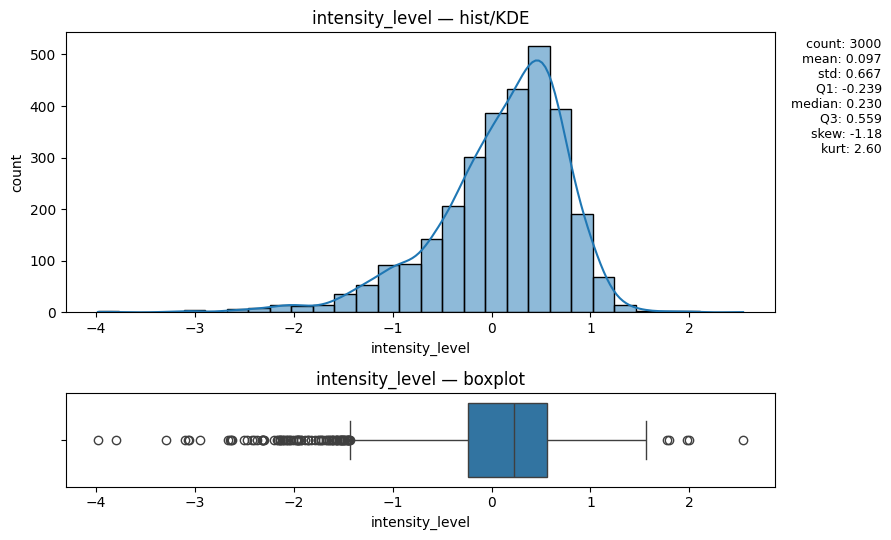

In [272]:
col = "intensity_level"
plot_univariate(df,col)

**mean** 0,97 < **median** 0,230, consistente com assimetria à esquerda.  
**Assimetria**: **skew** ≈ −1,18 → cauda longa à esquerda (muitos valores baixos/extremos negativos).  
**Caudas**: **kurt** ≈ 2,60, leptocúrtica (caudas pesadas), sendo que há mais pontos muito afastados do centro.  
**IQR**: **Q1** −0,239, **Q3** 0,559, **IQR** ≈ 0,798 mostando uma dispersão moderada no miolo.  
**Boxplot**: muitos outliers à esquerda (até ~−4) e alguns à direita (até ~2,3).

#### 1.2.1.9 verbal_density

Densidade de vocais/letras na faixa  quanto maior, mais presença vocal.
Se existirem faixas instrumentais, pode haver massa em valores mais baixos/negativos.  



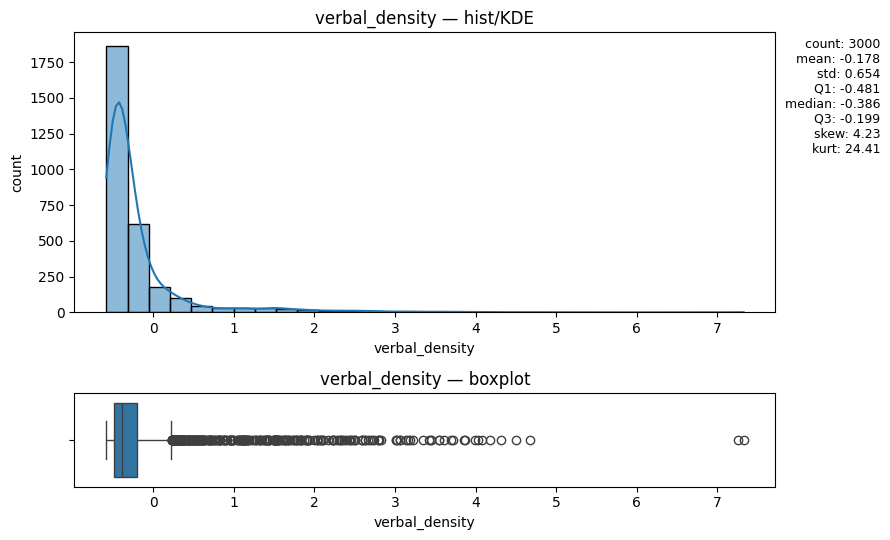

In [273]:
col = "verbal_density"
plot_univariate(df,col)

**Skew** = 4,23, forte cauda à direita (poucas faixas com densidade vocal muito alta).  
**Kurt** = 24,41, caudas extremamente pesadas (muitos pontos muito afastados do centro).  
**Mediana** = −0,386, **Q3** = −0,199, mais de 75% dos valores são negativos, isto pode indicar que esta feature foi estandardizada.  
O **histograma** concentra-se perto de valores pequenos e negativos, com outliers enormes até ~7,5.  
O **boxplot** confirma uma enxurrada de outliers à direita.

A maior parte das faixas tem baixa presença vocal.  
Um subconjunto muito pequeno tem densidade vocal excecionalmente alta, puxando a média e a dispersão.  

#### 1.2.1.10 positivity_index

Medida contínua que representa uma valência emocional positiva (quão “feliz/positiva” soa a faixa).  
Espera-se próxima de centrada (pode já estar normalizada).

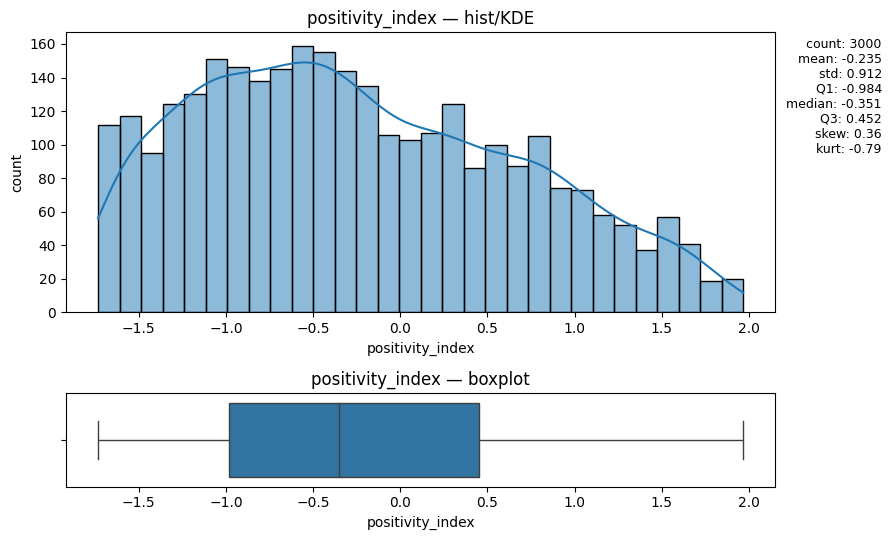

In [274]:
col = "positivity_index"
plot_univariate(df,col)

Distribuição com **leve cauda à direita**: **skew** = 0,36 e **kurtose negativa** = −0,79, que indica uma forma achatada e caudas relativamente leves. O centro está ligeiramente abaixo de zero (**mean** = −0,24 e **median** = −0,35) e o **IQR** é largo (~1,44), mostrando grande diversidade de valência emocional. 

#### 1.2.1.11 signal_power

Esta feature mede a potência do sinal de áudio. Em regra geral não deve ser negativa e tende a apresentar uma assimetria à direita (algumas faixas com potência muito alta).

Esperamos observar no Histograma uma cauda à direita mas com concentração perto de 0.

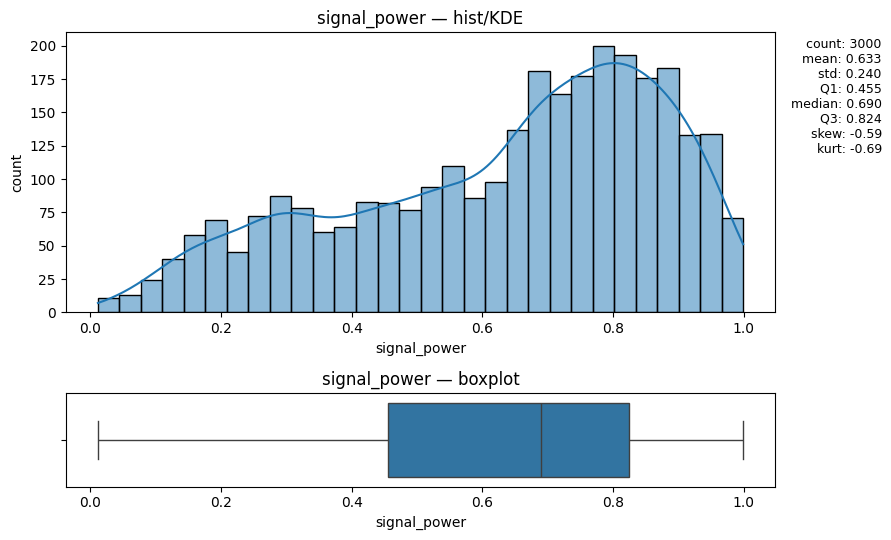

In [275]:
col = "signal_power"
plot_univariate(df,col)

Distribuição concentrada em valores médios/altos (**Med** = 0,69 e **IQR** = ~0,37), com **assimetria à esquerda** moderada (**skew** −0,59 e **kurtose negativa** = −0,69), o que indica uma forma achatada e caudas leves. Há poucas observações com potência muito baixa e quase não há extremos altos problemáticos.

#### 1.2.1.12 temp_vs_genre

Esta feature representa a relação entre tempo (BPM) e género/categoria é portanto uma feature derivada e contínua.  
Aqui pretendentos observar a forma geral (simétrica vs. cauda) o IQR (Q1–Q3) e outliers no boxplot.

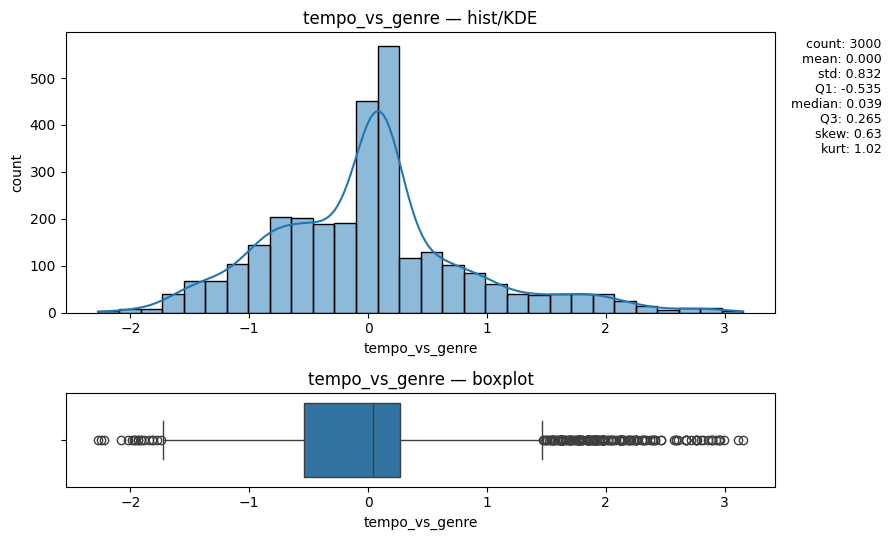

In [276]:
col = "tempo_vs_genre"
plot_univariate(df,col)

**mean** = 0, **median** = 0,039 e **IQR** ≈ 0,8 (**Q1** −0,535, **Q3** 0,265) revela boa dispersão no miolo.  
**skew** ≈ 0,63 com cauda à direita moderada, **kurt** ≈ 1,02, leptocúrtica (caudas um pouco pesadas comparado à Normal).  
**Outliers**: presentes em ambas as caudas, mais extensos à direita (até ~3,2), mas não dominam a distribuição.

A feature parece estar estandardizada (média ~0), a cauda direita sugere géneros com tempo bem acima do esperado para o seu género. A cauda à esquerda, abaixo do esperado.

#### 1.2.2.13 time_signature

Esta feature representa o número de tempos por compasso.
Aqui queremos observar a forma da distribuição contínua (assimetria/caudas) e presença de outliers.

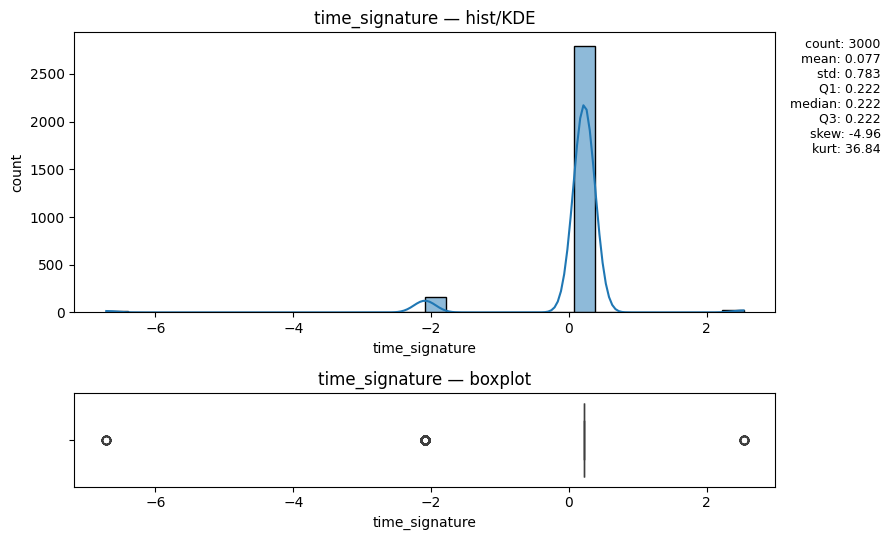

In [277]:
col = "time_signature"
plot_univariate(df,col)

Massa concentrada perto de 0,22:  **Q1** = **Q3** = 0,222, logo **IQR** = 0, a grande maioria das linhas partilha o mesmo valor transformado.
Caudas extremas: **Outiliers** fortes em −6,7, −2,1 e 2,3.
Assimetria: skew perto de −4,96 (cauda longa à esquerda).
Kurtose: kurt perto de 36,8, caudas muito pesadas.

Este gráfico demonstra uma variável que foi muito provavelmente estanderizada a partir de poucos níveis, o que resulta num valor dominante e alguns casos transformados para valores extremos (compassos raros).

#### 1.2.1.14 focus_factor

Caracteristica contínua que quantifica o grau de foco/presença instrumental.


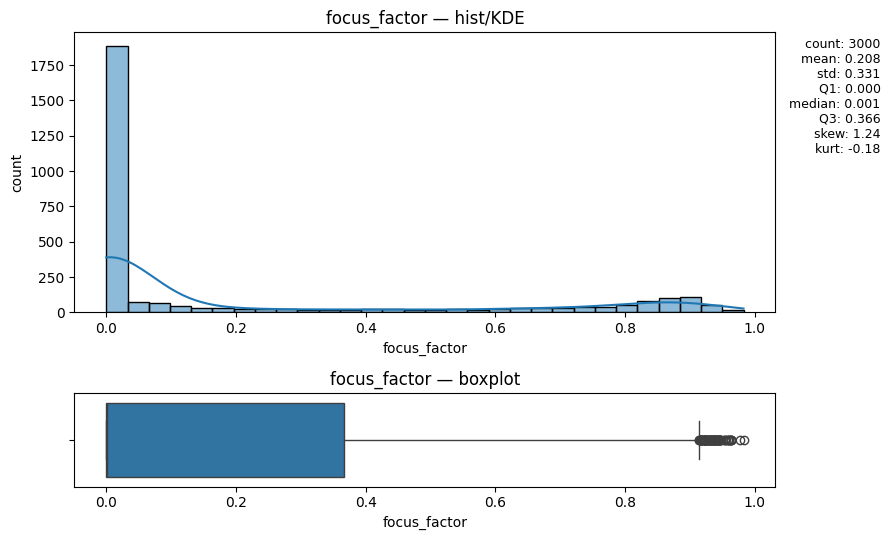

In [278]:
col = "focus_factor"
plot_univariate(df,col)

**Forma:** distribuição extremamente **concentrada perto de 0** (**Q1** = 0, mediana ≈ 0.001) com cauda direita longa (**skew** ≈ 1,24).  
**Dispersão:** **IQR** ≈ 0,369 e **desvio-padrão** ≈ 0,331.  
**Qualidade dos dados:** count = 2986, **14 faltas** (é aceitavel)

Podemos ver que a maioria das faixas tem pouca presença/foco instrumental e um subconjunto menor é muito focado (quase 1).


#### 1.2.2.15 key_mode

É a representação numérica estandardizada que resume tonalidade + modo.

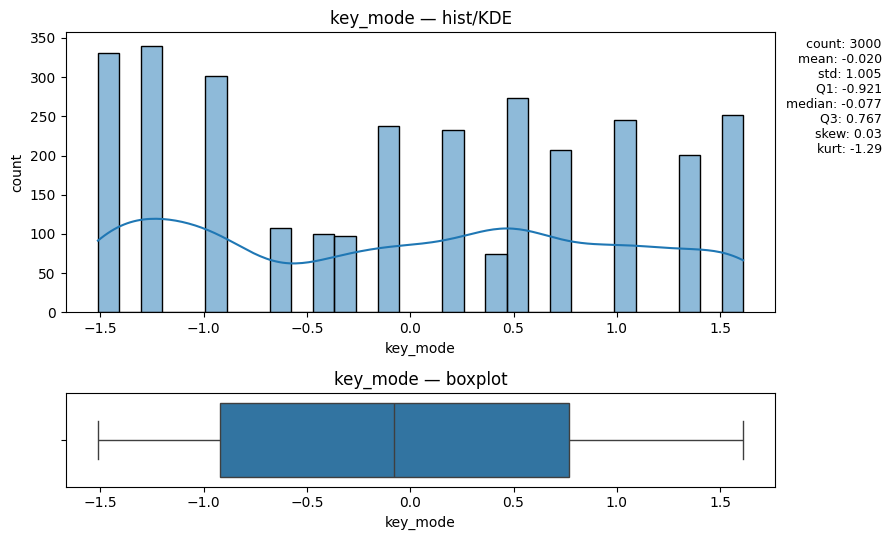

In [279]:
col = "key_mode"
plot_univariate(df,col)

**Skew** ≈ 0,02 praticamente simétrica.
**Kurt** ≈ −1,29, platocúrtica.


#### 1.2.2.16 acoustic_valence_mood_cluster
É a caracteristica que combina **acústica** e **valência** (humor positivo/negativo) oriundo de um processo de clustering/combinação.

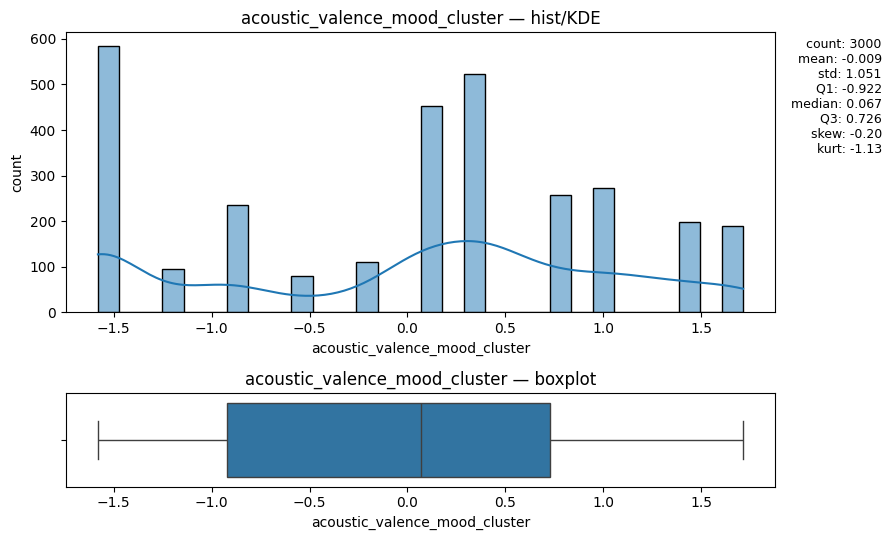

In [280]:
col = "acoustic_valence_mood_cluster"
plot_univariate(df,col)

**Skew** ≈ −0,20 (ligeira assimetria à esquerda).
**Kurt** ≈ −1.13, platocúrtica (caudas leves, poucos extremos).

#### 1.2.2.17 mood_cluster

É a projeção contínua de grupos de humor (resultado de clustering)

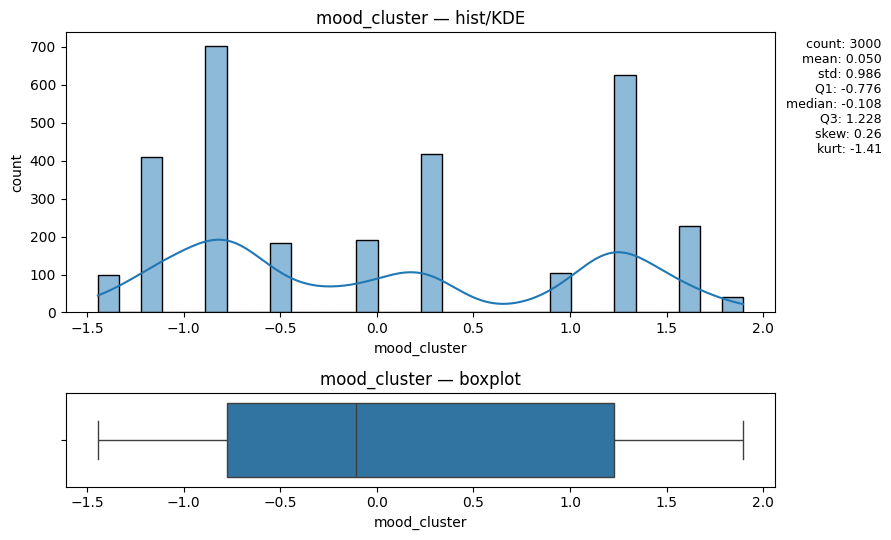

In [281]:
col = "mood_cluster"
plot_univariate(df,col)

**Skew** ≈ 0,26 ligeira assimetria à direita.
**Kurt** ≈ −1,42, platocúrtica (menos outliers que Normal).

### 1.2.2 Análise de Colunas Discretas e Categoricas

Aqui tentamos entender a distribuição das classes (frequências absolutas e percentuais), se há classes raras/desiquilibradas e a presença de valores em falta.  
Barras altas/baixas significam classes dominantes/raras.
% por classe serve para perceber o desiquilibrio(pode afetar modelos e métricas).

#### 1.2.2.1 Ordinais: popularity_level, tempo_class

As caracteristicas ordinais representam categorias com ordem natural sendo que neste dataset apenas duas se enquadram aqui:  
- `popularity_level`: 0 < 1 < 2 < 3 < 4.  
- `tempo_class`: classes de BPM do mais lento para o mais rápido.  
- `loudness_level`: faixas crescentes de intensidade.  
- `_duration_band`: reconstruída a partir de `duration_1` … `duration_5` como patamares 1 a 5.

Diferem das nominais por terem ordem e das contínuas por não serem valores reais.


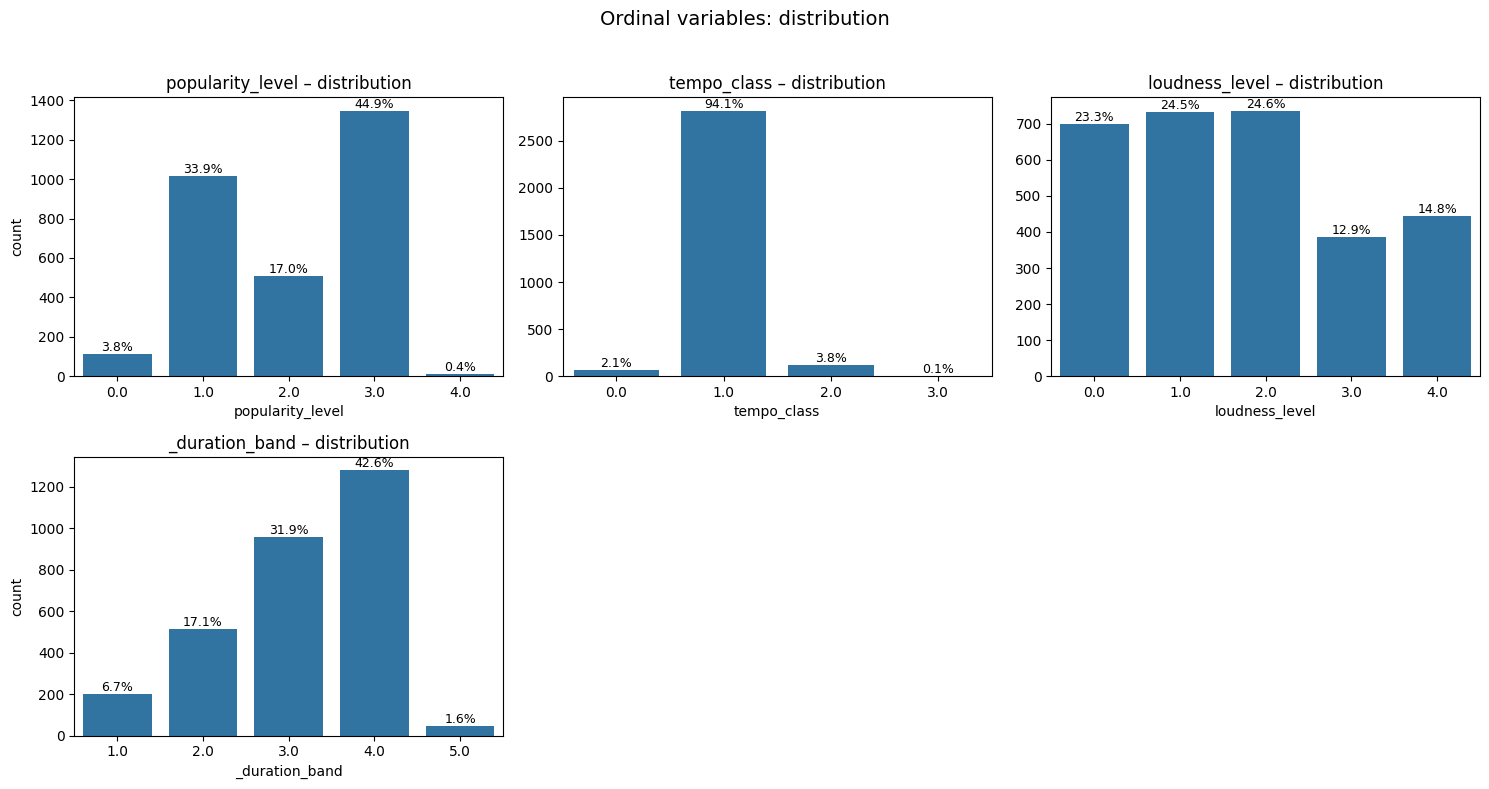

In [282]:
N = len(df)
duration_cols = ["duration_1", "duration_2", "duration_3", "duration_4", "duration_5"]
has_all = all(c in df.columns for c in duration_cols)
if has_all:
    # idxmax retorna o primeiro nível com 1. Se todos 0, resultado é o primeiro índice, por isso mascarar zeros.
    dur_vals = df[duration_cols].values
    all_zero = (dur_vals.sum(axis=1) == 0)
    duration_band = pd.Series(np.argmax(dur_vals, axis=1) + 1, index=df.index).astype("Float64")
    duration_band[all_zero] = pd.NA
    df["_duration_band"] = duration_band
else:
    df["_duration_band"] = pd.NA  # marcador ausente se não existir o conjunto

ordinal_cols = []
if "popularity_level" in df.columns:
    ordinal_cols.append("popularity_level")
if "tempo_class" in df.columns:
    ordinal_cols.append("tempo_class")
if "loudness_level" in df.columns:
    ordinal_cols.append("loudness_level")
# adicionar banda de duração derivada se existir
if "_duration_band" in df.columns and df["_duration_band"].notna().any():
    ordinal_cols.append("_duration_band")

# Layout
n_cols = 3
n_rows = math.ceil(len(ordinal_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
fig.suptitle("Ordinal variables: distribution", fontsize=14)
axes = np.array(axes).reshape(-1)  # flatten robusto

for i, col in enumerate(ordinal_cols):
    ax = axes[i]
    # Ordem crescente numérica se possível, senão ordem natural dos níveis únicos
    levels = df[col].dropna().unique().tolist()
    try:
        order = sorted(levels, key=lambda x: float(x))
    except Exception:
        order = sorted(levels)
    sns.countplot(data=df, x=col, order=order, ax=ax)
    ax.set_title(f"{col} – distribution")
    ax.set_xlabel(col)
    ax.set_ylabel("count" if i % n_cols == 0 else "")
    ax.tick_params(axis="x", rotation=0)
    # Anotar percentagens
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(f"{100*h/N:.1f}%", (p.get_x() + p.get_width() / 2.0, h),
                        ha="center", va="bottom", fontsize=9)

# Esconder eixos não usados
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

`popularity_level`  
Distribuição concentrada em níveis altos: 3 ≈ 44,9%, 1 ≈ 33,9%, 2 ≈ 17,0%, extremos quase nulos.  
A amostra mostra predominância de popularidade média e alta.  
Tratar como ordinal. Considerar fusão de caudas se algum nível tiver frequência residual.

`tempo_class`  
Concentração extrema na classe 1 ≈ 94,1% com 0 ≈ 2,1%, 2 ≈ 3,8%, 3 ≈ 0,1%.  
Quase constante, informação limitada.  
Avaliar remoção ou reagrupamento em binário lento vs. não lento, condicionado por validação.

`loudness_level`  
Distribuição mais repartida: 0 ≈ 23,3%, 1 ≈ 24,5%, 2 ≈ 24,6%, 3 ≈ 12,9%, 4 ≈ 14,8%.  
Entropia moderada, sem dominância severa.  
Manter como ordinal. Se necessário para modelos simples, agrupar níveis adjacentes preservando ordem.

`_duration_band`  
Distribuição assimétrica para patamares altos: 1 ≈ 6,7%, 2 ≈ 17,1%, 3 ≈ 31,9%, 4 ≈ 42,6%, 5 ≈ 1,6%.  
Predomínio de durações médias e longas, cauda rara no patamar 5.  
Manter como ordinal derivada do one-hot. Verificar consistência de exclusividade entre `duration_1` … `duration_5`. Se existirem linhas sem nenhum patamar ativo, marcar como ausente explícito.


#### 1.2.2.2 Binárias: explicit, mode_indicator, time_signature_class_boolean, is_instrumental, is_dance_hit e durations

As caracteristicas binárias assumem dois estados (0/1, False/True) e nestas variaveis interessam-nos as **proporções** e o **desequilíbrio** (ex.: 95/5).


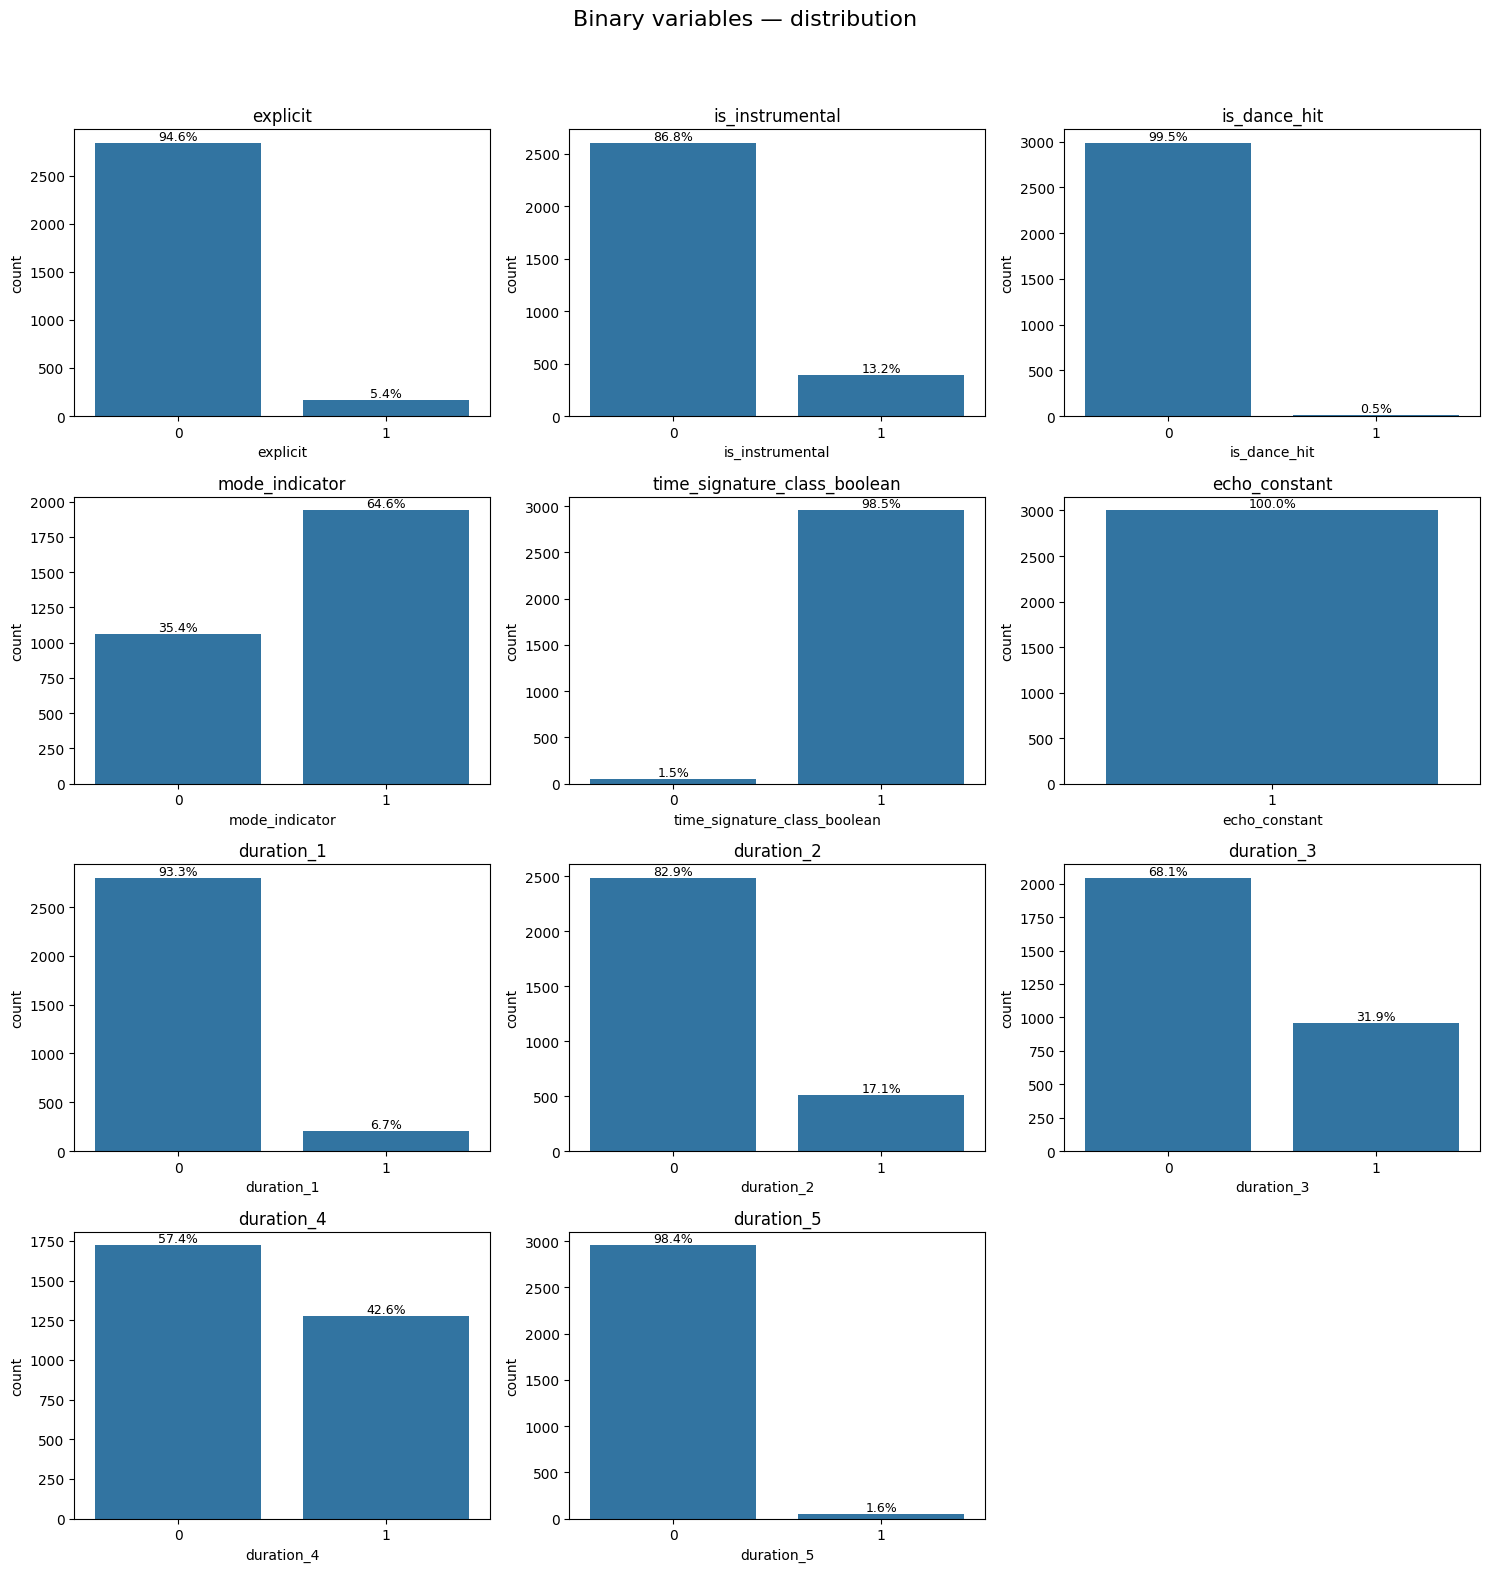

In [283]:
# Colunas binária
bin_cols = [
    "explicit", "is_instrumental", "is_dance_hit", "mode_indicator",
    "time_signature_class_boolean", "echo_constant",
    "duration_1", "duration_2", "duration_3", "duration_4", "duration_5",
]
bin_cols_plot = [c for c in bin_cols if c in df.columns]
n_cols = 3
n_rows = math.ceil(len(bin_cols_plot) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten() if hasattr(axes, "flatten") else [axes]
fig.suptitle("Binary variables — distribution", fontsize=16)
N = len(df)

for i, col in enumerate(bin_cols_plot):
    s = df[col]

    # 1) Normalizar para 0/1 inteiros (suporta bool, 0/1 como float/str)
    s_num = pd.to_numeric(s, errors="coerce")        # tenta converter
    if set(s_num.dropna().unique()).issubset({0.0, 1.0}):
        s_plot = s_num.astype("Int64")               # 0/1 inteiros com NA (se houver)
    else:
        # fallback: tratar como bool → int
        s_plot = s.astype(bool).astype("Int64")

    # 2) Ordem a partir dos valores existentes (evita mismatch de tipos)
    order = sorted(v for v in s_plot.dropna().unique().tolist())

    ax = axes[i]
    # 3) Passar a SÉRIE diretamente (não o nome da coluna)
    sns.countplot(x=s_plot, order=order, ax=ax)
    ax.set_title(col)
    ax.set_xlabel(col); ax.set_ylabel("count")

    # 4) Percentagens
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(f"{100*h/N:.1f}%", (p.get_x()+p.get_width()/2, h),
                        ha="center", va="bottom", fontsize=9)
# esconder eixos vazios
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0,0,1,0.95]); plt.show()

`explicit`: ~5,4% = 1 (conteúdo explícito), 94,6% = 0 mostra desequilíbrio forte.  
`is_instrumental`: ~13,2% = 1, 86,8% = 0 revela um desequilíbrio, mas menos extremo que explicit.  
`is_dance_hit`: ~0,5% = 1, 99,5% = 0, quase constante o que revela um risco de sobreajuste.  
`mode_indicator`: ~64,6% = 1, 35,4% = 0 é relativamente equilibrada.  
`time_signature_class_boolean`: ~98,5% = 1, 1,5% = 0 mais uma vez quase constante ou seja tem baixo poder descriminativo.  
`echo_constant`:100% = 1. Variável constante.  
`duration_1`:- 1 ≈ 6,7%, 0 ≈ 93,3%. Desequilíbrio acentuado.  
`duration_2`: 1 ≈ 17,1%, 0 ≈ 82,9%. Desequilíbrio moderado.  
`duration_3`:- 1 ≈ 31,9%, 0 ≈ 68,1%. Mais frequente que as anteriores.  
`duration_4`:- 1 ≈ 42,6%, 0 ≈ 57,4%.  
`duration_5`:- 1 ≈ 1,6%, 0 ≈ 98,4%. Extremamente raro.

#### 1.2.2.3 Nominais: target_class

São categorias sem ordem natural. Aqui interessa medir proporções por classe e verificar desequilíbrio.


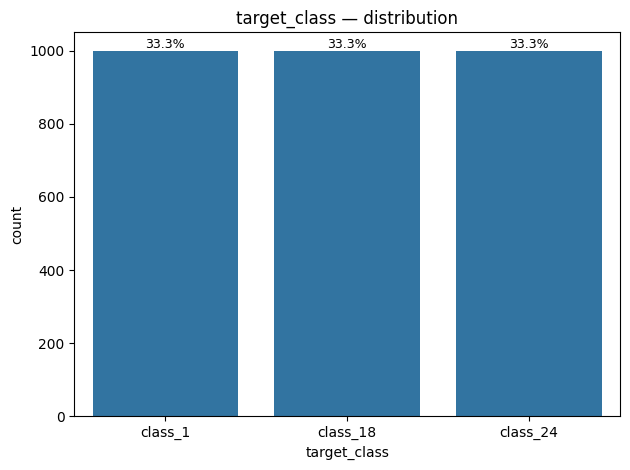

In [284]:
col = "target_class"
N = len(df)
order = df[col].value_counts().index  # mais frequentes primeiro

ax = sns.countplot(data=df, x=col, order=order)
ax.set(title=f"{col} — distribution", xlabel=col, ylabel="count")
#ax.tick_params(axis="x", rotation=25, ha="right")

# anotar percentagens no topo
for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.annotate(f"{100*h/N:.1f}%", (p.get_x()+p.get_width()/2, h),
                    ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


**Distribuição**: perfeitamente equilibrada class_1, class_18 e class_24 com 33,3% cada (1000 registos por classe).  


## 1.3 Análise Bivariate

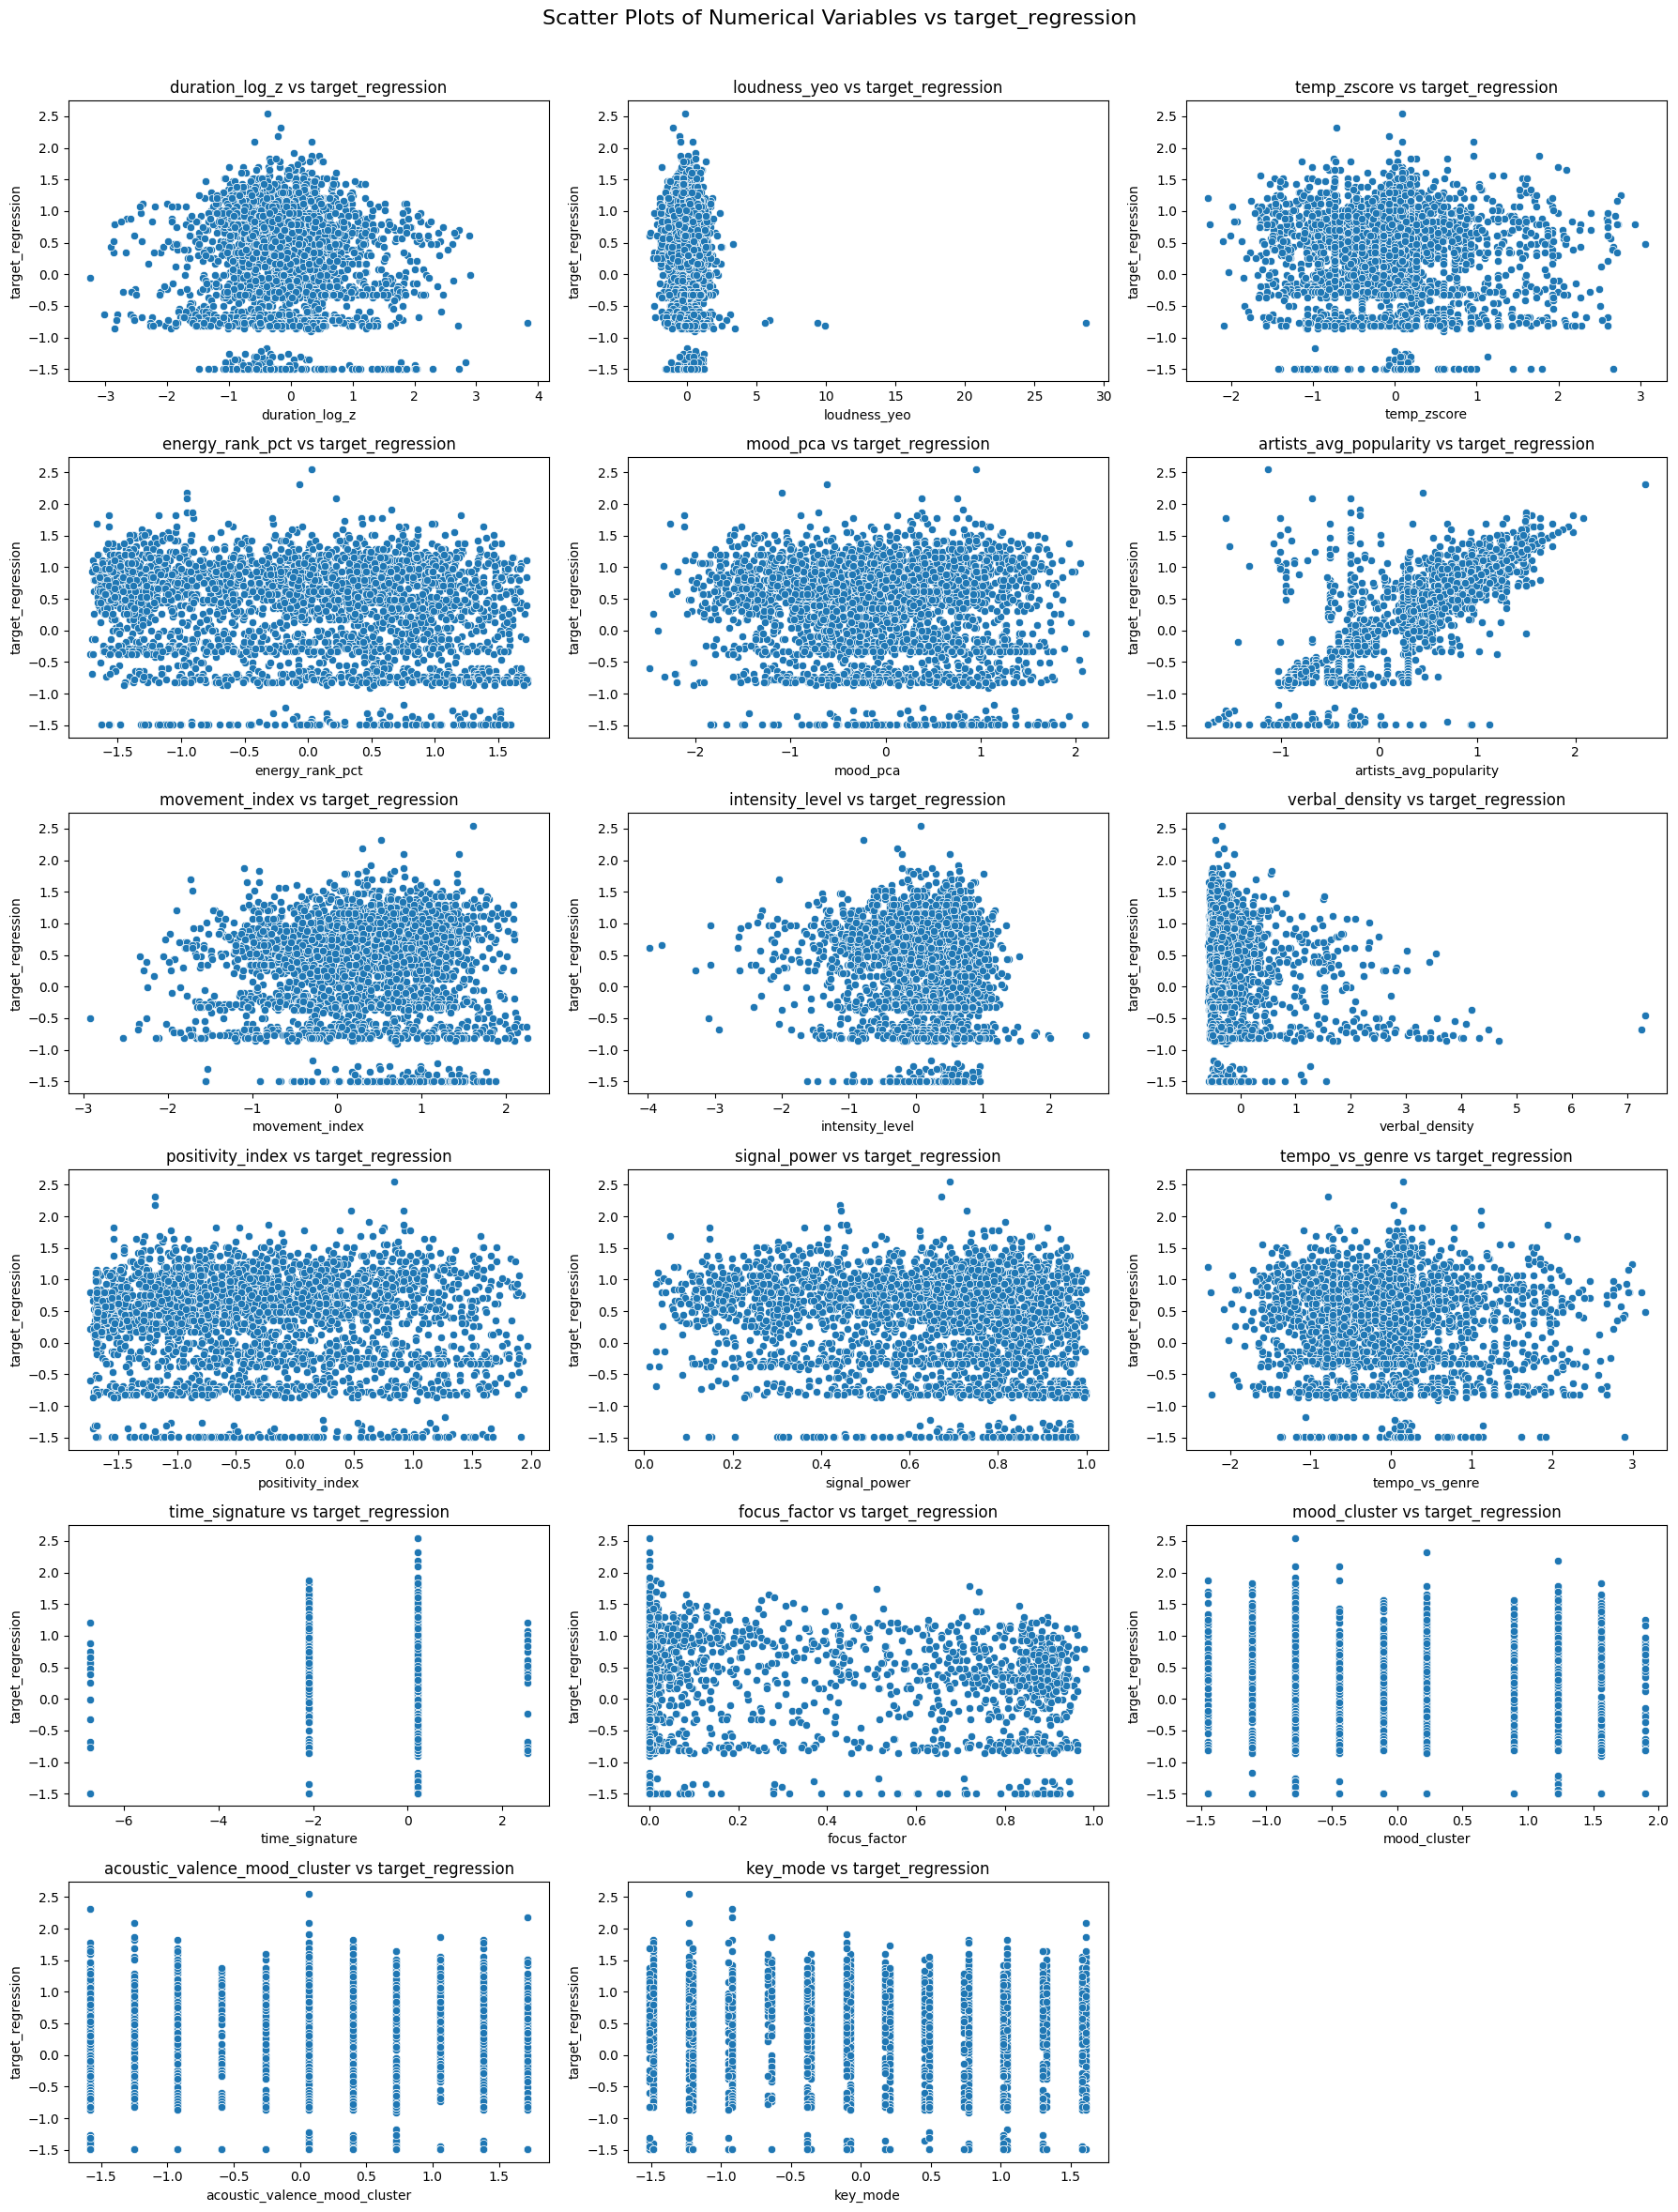

In [285]:
target_column = 'target_regression'

# Grid setup
n_cols = 3
n_rows = math.ceil(len(cont_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
fig.suptitle(f'Scatter Plots of Numerical Variables vs {target_column}', fontsize=16)

axes = axes.flatten() # Flatten axes

for idx, col in enumerate(cont_cols):
    sns.scatterplot(x=col, y=target_column, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} vs {target_column}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel(target_column)

# Hide extra subplots (if any)
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

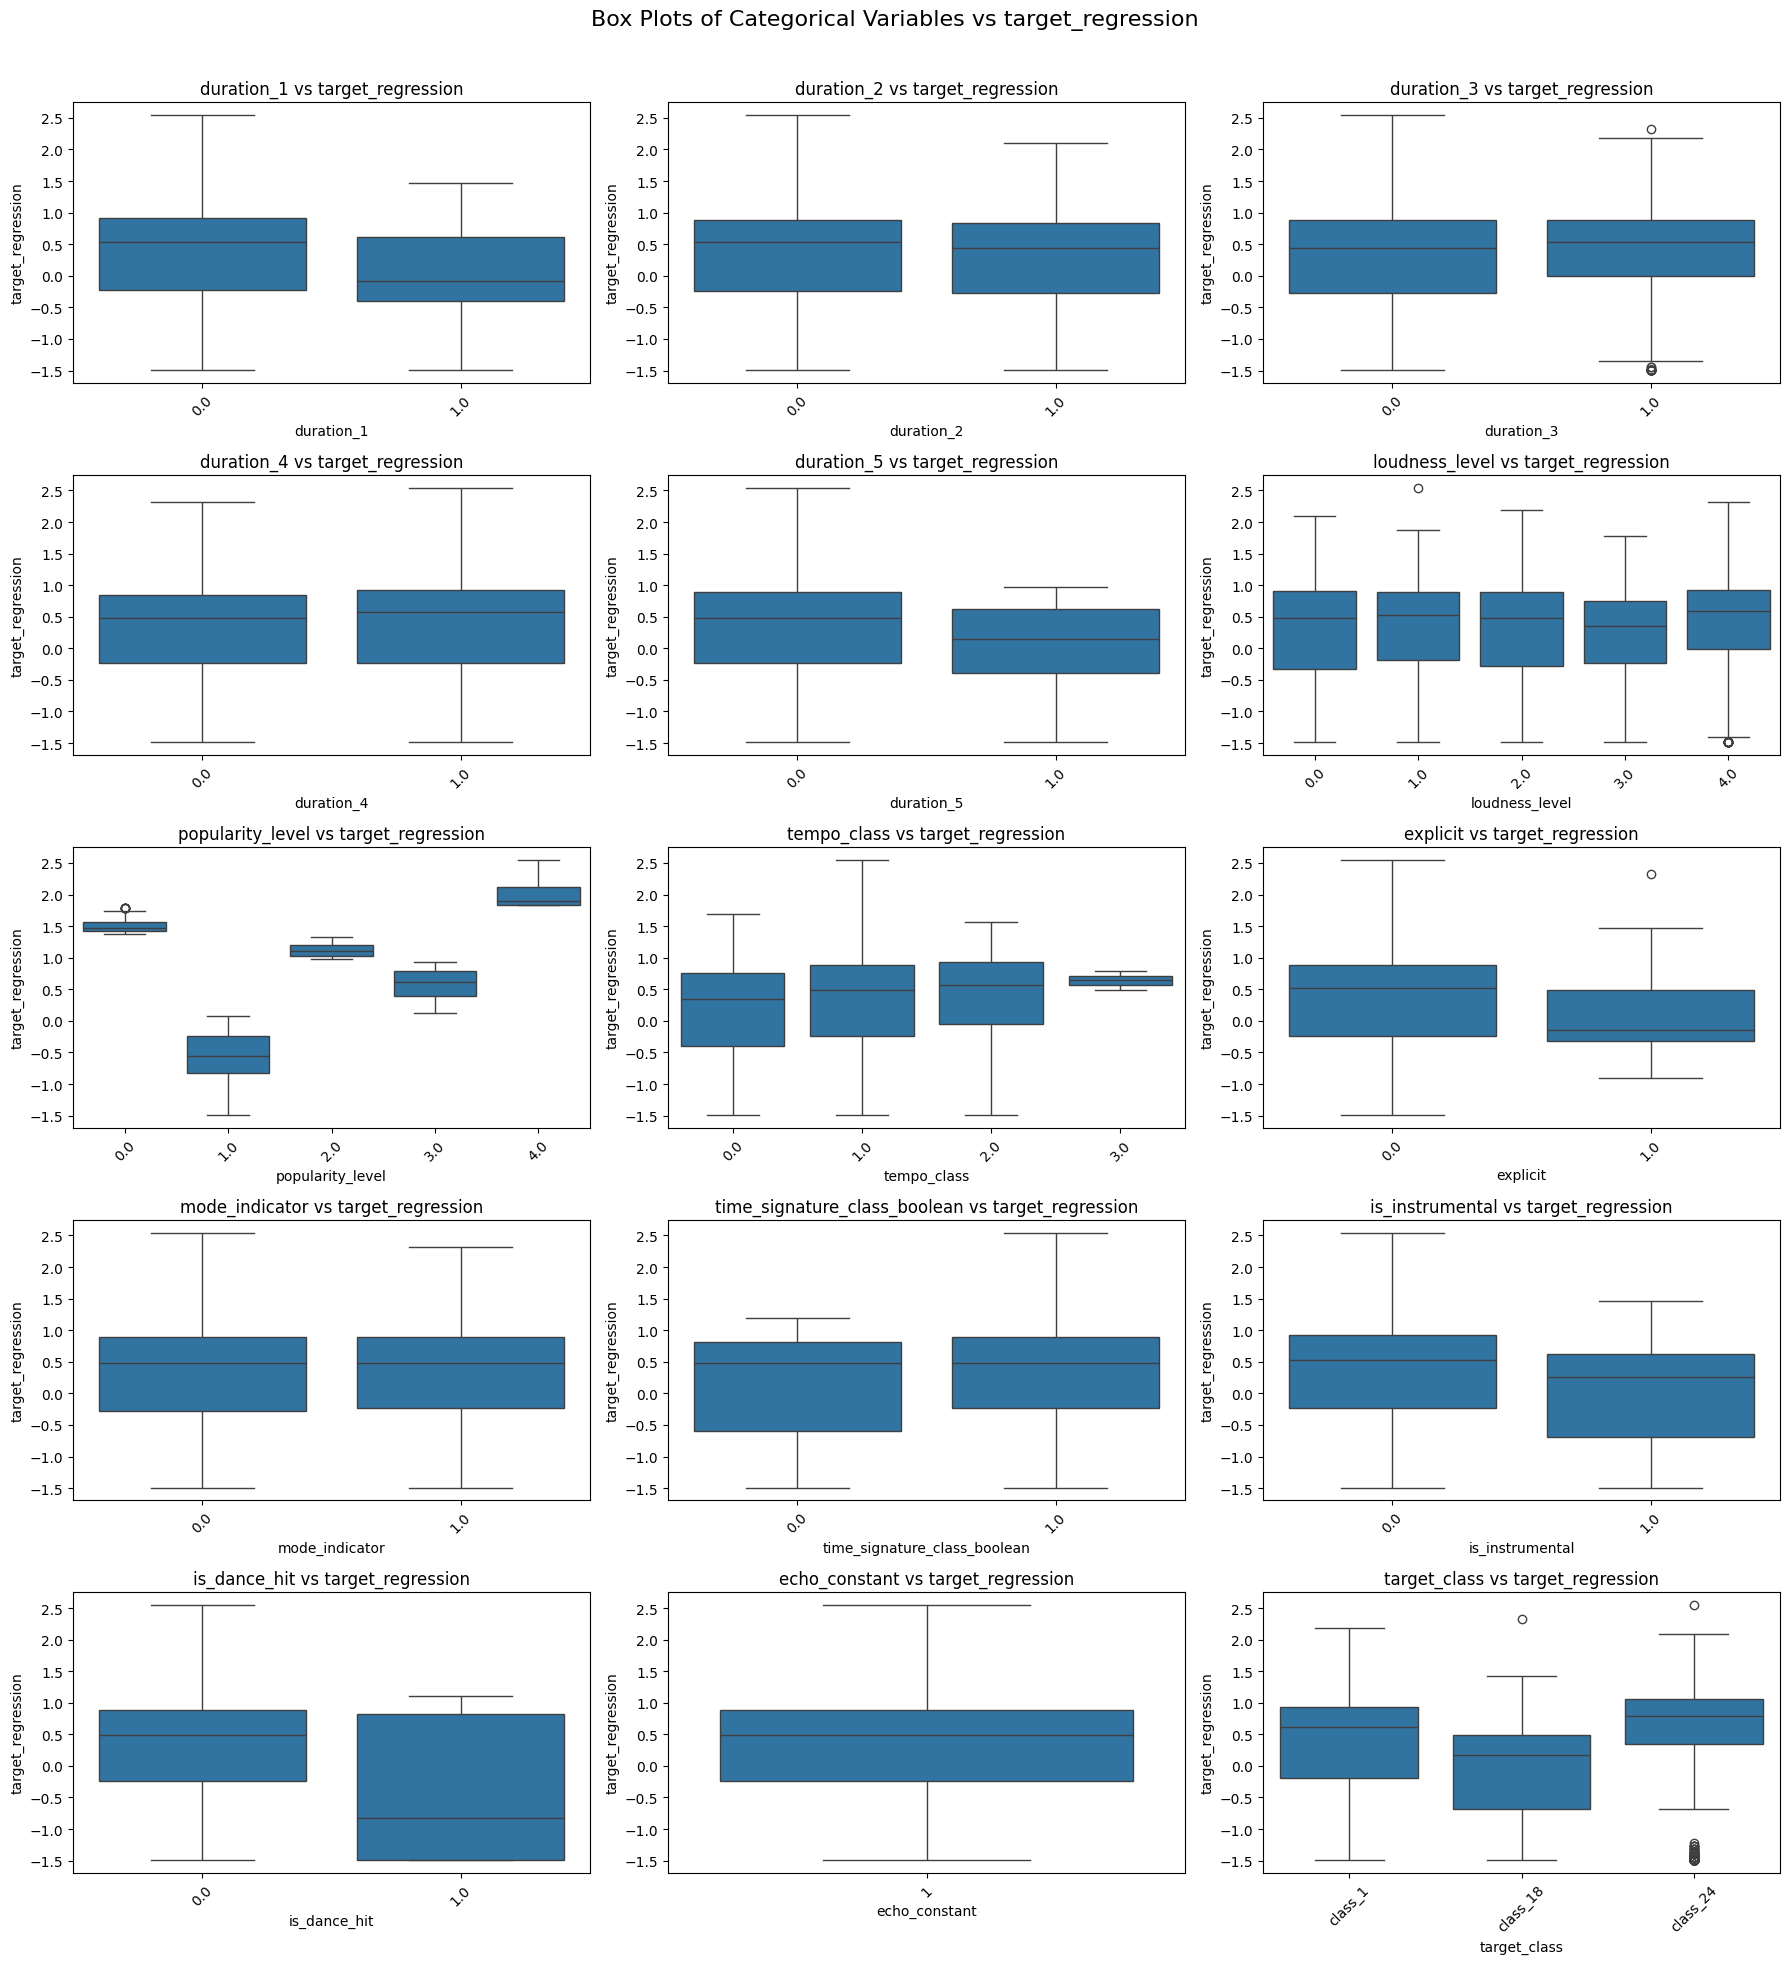

In [286]:
target_column = 'target_regression'

# Grid setup
n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
fig.suptitle(f'Box Plots of Categorical Variables vs {target_column}', fontsize=16)

axes = axes.flatten() # Flatten axes

for idx, col in enumerate(cat_cols):
    sns.boxplot(x=col, y=target_column, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} vs {target_column}')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### 1.3.1 Continua x Continua: key_cos vs key_sin

`key_cos` e `key_sin` são **variáveis contínuas** em `[-1, 1]`. No entanto elas formam, em par, uma codificação circular (cos/sin) do tom musical.
Individualmente, cada coluna perde informação (apenas a projeção no eixo X ou Y) sendo que apenas juntas, revelam a geometria circular:  
- aglomerados angulares indicam chaves mais frequentes;  
- eventuais buracos/assimetria sugerem chaves raras ou preferências estilísticas.


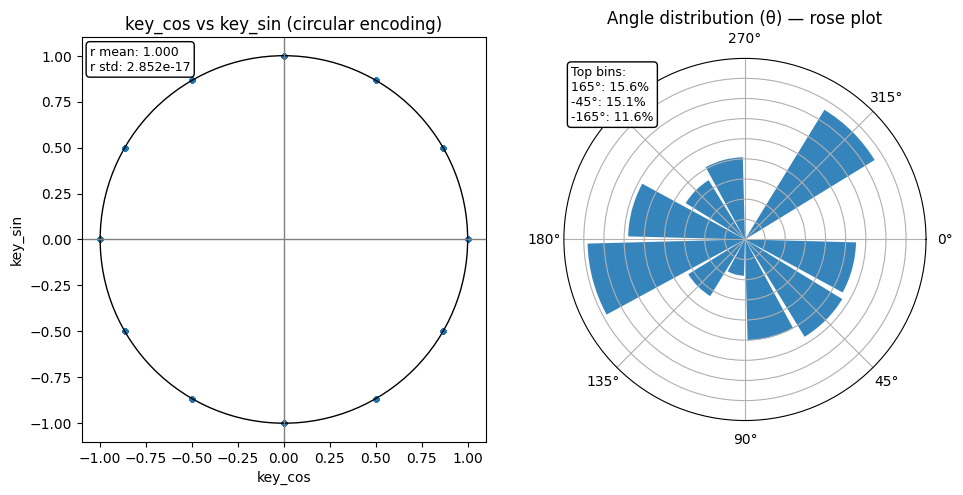

In [287]:
# Séries com as componentes da codificação circular da tonalidade
x = df["key_cos"]
y = df["key_sin"]

# Ângulo (theta) e raio (r) no plano: a partir de (cos, sin)
# - theta = atan2(y, x) devolve o ângulo em radianos no intervalo [-π, π]
# - r = hypot(x, y) = sqrt(x^2 + y^2) (deve ser ≈ 1, pois é um ponto no círculo unitário)
theta = np.arctan2(y, x)  # [-π, π]
r = np.hypot(x, y)

# Definir os "baldes" (bins) do gráfico polar tipo "rosa"
# Aqui usamos 12 bins para refletir as 12 classes de tom (pitch classes)
B = 12
bins = np.linspace(-np.pi, np.pi, B + 1)  # 12 intervalos iguais cobrindo todo o círculo

# Histograma do ângulo (contagem por bin) e percentagens
# - ignoramos NaN no theta
hist, edges = np.histogram(theta[~np.isnan(theta)], bins=bins)
pct = hist / hist.sum() * 100  # converter contagens para percentagens
centers = (edges[:-1] + edges[1:]) / 2  # centro de cada bin (ângulo médio)

# Encontrar os 3 bins mais frequentes para anotar
top_idx = np.argsort(pct)[-3:][::-1]  # índices das top-3 percentagens (ordem decrescente)
top_txt = "\n".join([f"{np.degrees(centers[i]):.0f}°: {pct[i]:.1f}%" for i in top_idx])

# Criar a figura com 2 subplots lado a lado:
#  - à esquerda: scatter (key_cos vs key_sin) com o círculo unitário
#  - à direita: histograma polar (rose plot) das direções (ângulos)
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1.3, 1])  # esquerda um pouco mais larga

# (A) Scatter cos-sin (verifica codificação circular)
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(x, y, s=10, alpha=0.4)  # pontos (cos, sin)
circ = plt.Circle((0, 0), 1, fill=False)  # círculo unitário de referência
ax1.add_patch(circ)
# eixos de referência
ax1.axhline(0, color="gray", lw=1); ax1.axvline(0, color="gray", lw=1)
ax1.set_aspect("equal", adjustable="box")  # escala igual em X e Y (círculo não distorce)
ax1.set_title("key_cos vs key_sin (circular encoding)")
ax1.set_xlabel("key_cos"); ax1.set_ylabel("key_sin")

# Caixa de estatísticas radiais (deve dar r≈1 e desvio muito baixo)
r_mean, r_std = np.nanmean(r), np.nanstd(r)
ax1.text(0.02, 0.98, f"r mean: {r_mean:.3f}\nr std: {r_std:.3e}",
         transform=ax1.transAxes, ha="left", va="top",
         bbox=dict(boxstyle="round", fc="white"), fontsize=9)

# (B) Gráfico polar (rose plot) das percentagens por ângulo
ax2 = fig.add_subplot(gs[0, 1], projection="polar")
# barras centradas nos ângulos de cada bin; largura ~90% do bin
ax2.bar(centers, pct, width=(2 * np.pi / B) * 0.9, align="center", alpha=0.9)
ax2.set_title("Angle distribution (θ) — rose plot", pad=25)  # pad afasta o título do centro
# Ajustar convenções de ângulo:
ax2.set_theta_zero_location("E") # 0° apontado para Este (1,0) — coerente com o eixo do cos
ax2.set_theta_direction(-1) # ângulos no sentido horário (como é comum em música)
ax2.set_yticklabels([]) # esconder rótulos radiais (limpa o visual)
ax2.set_ylim(0, max(pct) * 1.15) # margem superior para não cortar as barras

# Anotar as top-3 direções mais frequentes (ângulo em graus e percentagem)
ax2.text(0.02, 0.98, f"Top bins:\n{top_txt}",
         transform=ax2.transAxes, ha="left", va="top",
         bbox=dict(boxstyle="round", fc="white"), fontsize=9)

plt.tight_layout()
plt.show()


- **Codificação válida:** raio médio r ≈ 1 e desvio ~0. pontos exatamente no **círculo unitário** (sem ruído radial).  
- **Quantização angular:** os pontos surgem em **12 direções discretas** (pitch classes), como esperado para tonalidades.  
- **Distribuição não uniforme:** o “rose plot” mostra picos em ~165° (15.6%), −45° (15.1%) e −165° (11.6%), certas chaves são mais frequentes no dataset. 

## 2.3 Síntese do estudo do dataset

### Qualidade e forma dos dados
- Dataset geralmente limpo. Algumas colunas vieram como datatye object e foram corrigidas.  
- Poucos valores ausentes (ex.: `focus_factor` com cerca de 14 NaN).  
- Variáveis limitadas:  
  - Intervalo [0,1]: `signal_power`, `energy_rank_pct`  
  - Z-score (média≈0, desvio≈1): `temp_zscore`, `duration_log_z`

### Variáveis contínuas
- **Quase normais:** `duration_log_z`, `mood_pca` (ligeiramente platicúrtica).  Sendo estas adequadas para modelos lineares sem grandes transformações.  
- **Assimetria leve:**  
  - `temp_zscore` (direita)  
  - `movement_index` (esquerda)  
  - `positivity_index` (direita)  
  - `artists_avg_popularity` (multimodal)  

- **Assimetria forte, caudas pesadas:**  
  - `loudness_yeo`: cauda direita extrema.  
  - `verbal_density`: muitos zeros, cauda longa direita.  
  - `focus_factor`: inflação de zeros, cauda longa direita.  
  - `intensity_level`: assimetria esquerda com outliers.  

- **Variáveis 0–1:**  
  - `signal_power` (tendência para valores altos)  
  - `energy_rank_pct` (quase uniforme)

### Variáveis discretas / categóricas

**Ordinais:**  
- `popularity_level`: enviesada (nível 3 ≈45%, nível 1 ≈34%).  
- `tempo_class`: dominada por uma categoria (~94% classe 1).  

**Binárias (desequilíbrio):**  
- Raras: `is_dance_hit` (~ 0,5%), `time_signature_class_boolean` (~ 98,5% 1s).  
- Moderadas: `explicit` (~ 5% “sim”), `is_instrumental` (~ 13% “sim”).  
- Quase equilibrada: `mode_indicator` (~65/35).  

Convém remover binárias quase constantes.  

### Variável alvo
- `target_class`: perfeitamente equilibrada (~33% cada).  

### Variáveis circulares (tom musical)
- `key_cos` e `key_sin` estão no círculo unitário (r≈1), com 12 ângulos discretos.  
- Distribuição angular não uniforme com algumas chaves mais frequentes.  

# 3 Aplicação de Métodos - Regressão

Nesta fase são aplicados **métodos de regressão** com a finalidade de prever a variável **"target_regression"** presente no dataset fornecido.
Assim, o principal foco desta secção é encontrar uma **função** que descreva, com a **menor margem de erro possivel**, a **relação** entre essas variáveis, de maneira a conseguir fazer uma **estimativa de valores futuros ou desconhecidos** da variável que se pretende analisar.

Para avaliar o **desempenho dos modelos**, foi utilizada a técnica **hold-out**, que consiste em dividir o conjunto de dados em duas partes:

- **Treino (80%)** – utilizado para ajustar o modelo;

- **Teste (20%)** – utilizado para avaliar o desempenho do modelo em dados não observados.

Posteriormente, o **desempenho dos modelos** será medida através das métricas:
- **RSS**: Soma dos quadrados dos resíduos. Quanto menor o RSS, melhor o ajuste do modelo aos dados.
- **R²**: Coeficiente da variabilidade do modelo (preferencialmente, este valor deve aproximar-se o máximo possível de 1);
- **MAE**: Erro médio absoluto. É utilizado para medir o erro médio entre os valores reais e os valores previstos;
- **RMSE**: Usada no sentido de verificar o quão longe, em média, estão as previsões obtidas em relação aos valores reais.

In [288]:
# Librarias utilizadas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


## 3.1 Regressão Linear Simples
Na sequência do que foi indicado anteriormente, irá ser realizada uma **Regressão Linear Simples**.
Esta tem como objetivo **encontrar a relação entre uma variável dependente e uma única variável independente**.
Assim sendo, pretendemos **prever a variável "target_regression"**, partindo de **uma das variáveis independentes** (features) do dataset fornecido.
Para isto, é utilizada a seguinte **expressão** para demonstrar a **relação linear** entre as variáveis utilizadas:
\\[
Y=β0​+β1​X+ε
\\]

onde:

- Y representa a **variável dependente** (target_regression),
- X representa a **variável independente** (feature do dataset),
- β0 é o **intercepto** (valor de Y quando X = 0),
- β1 é o **coeficiente angular/inclinação da reta** (influência de X sobre Y),
- ε é o **erro aleatório** (diferença entre valores reais e previstos).

### 3.1.1 Testar um modelo utilizando uma única feature
Numa primeira fase, é realizado um **modelo de regressão linear simples** utilizando **uma única variável independente**.
Escolhemos, por exemplo, a variável **"tempo_vs_genre"**.
Esta escolha trata-se apenas de um exemplo. Posteriormente, serão testadas **todas as variáveis** com o objetivo de **observar a força da relação entre cada uma dessas features e a variável "target_regression"**.

In [289]:
# Definir variável independente (X) e dependente (y)
X = df[['tempo_vs_genre']]
y = df['target_regression']

# Método Hold-out: Divisão entre amostras de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação do modelo
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Realizar previsões
y_pred = model.predict(X_test)

# Avaliar o modelo com 4 casas décimais (utilizado posteriormente para comparação e discussão de resultados) 
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.0030
MAE: 0.6336
RMSE: 0.7653


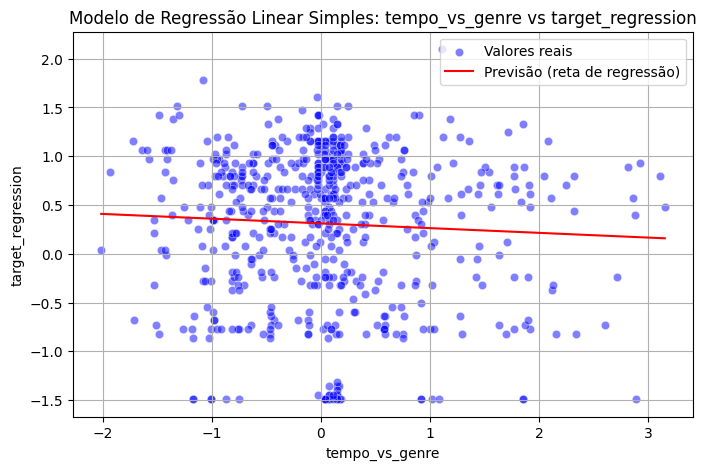

In [290]:
# Relação linear entre tempo_vs_genre e target_regression:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['tempo_vs_genre'], y=y_test, color='blue', alpha=0.5, label='Valores reais')
sns.lineplot(x=X_test['tempo_vs_genre'], y=y_pred, color='red', label='Previsão (reta de regressão)')
plt.xlabel('tempo_vs_genre')
plt.ylabel('target_regression')
plt.title('Modelo de Regressão Linear Simples: tempo_vs_genre vs target_regression')
plt.legend()
plt.grid(True)
plt.show()

In [291]:
# Coeficientes da regressão linear
intercept = model.intercept_
inc = model.coef_[0]

print(f"Intercepto (β₀): {intercept:.4f}")
print(f"Inclinação (β₁): {inc:.4f}")

print(f"Fórmula de Relação Linear: target_regression = {intercept:.4f} + ({inc:.4f} x tempo_vs_genre)")


Intercepto (β₀): 0.3115
Inclinação (β₁): -0.0484
Fórmula de Relação Linear: target_regression = 0.3115 + (-0.0484 x tempo_vs_genre)


Para **avaliar o desempenho dos modelos de regressão linear simples**, foi utilizado o **RSS (Residual Sum of Squares)**, que **mede o erro total** entre os **valores reais** e as **previsões**.
Este método tem a vantagem de ser simples e baseado diretamente nos **resíduos do modelo**, sem depender de métricas normalizadas como **R²**, **MAE** ou **RMSE**.
É também de notar que: **Valores mais baixos de RSS** indicam um modelo com **melhor ajuste aos dados**.

In [292]:
# Calcular resíduos do modelo
res = y_test - y_pred

# Calcular RSS
RSS = np.sum(res ** 2)
print(f"Valor de RSS: {RSS:.2f}")

Valor de RSS: 351.42


Um valor de **RSS elevado**, neste caso **351.42**, **sugere** que a variável **tempo_vs_genre não tem uma boa correlação com a variável target_regression**.
No entanto, este valor apenas fará sentido quando comparado ao **RSS obtido por outras features**.

### 3.1.2 Testar um modelo utilizando diferentes features
Procedemos à **avaliação de diferentes variáveis independentes** com a finalidade de **identificar** qual delas representa o **melhor desempenho** na **previsão da variável dependente "target_regression"**.
Para isto, são testadas **várias features** do dataset fornecido, identificando um **modelo de regressão linear** para cada uma delas e avaliando o seu respetivo **desempenho** através da **métrica RSS**, permitindo que, no final, consigamos selecionar a **variável independente** que possua uma **maior correlação** com a **variável dependente "target_regression"**.

Como visto na **análise do dataset**, existem **features** que **não** são do **tipo numérico**:

In [293]:
# Mostrar tipo de dados para cada coluna
print("Tipos de dados por coluna:\n")
for col, dtype in df.dtypes.items():
    print(f"{col}: {dtype}")


Tipos de dados por coluna:

duration_1: float64
duration_2: float64
duration_3: float64
duration_4: float64
duration_5: float64
loudness_level: float64
popularity_level: float64
tempo_class: float64
time_signature: float64
key_mode: float64
artist_song_count: float64
album_freq: float64
movement_index: float64
intensity_level: float64
verbal_density: float64
purity_score: float64
positivity_index: float64
activity_rate: float64
loudness_intensity: float64
happy_dance: float64
acoustics_instrumental: float64
artists_avg_popularity: float64
tempo_vs_genre: float64
energy_rank_pct: float64
loud_energy_ratio: float64
mood_pca: float64
mood_cluster: float64
acoustic_valence_mood_cluster: float64
explicit: float64
signal_strength: float64
mode_indicator: float64
focus_factor: float64
ambient_level: float64
key_sin: float64
key_cos: float64
duration_log: float64
duration_log_z: float64
time_signature_class_boolean: float64
loudness_yeo: float64
is_instrumental: float64
is_dance_hit: float64
t

Não foi possível ajustar a variável **"target_class"** para o **tipo numérico** e, por isso, decidimos **filtrar os dados** para **percorrer apenas** as **colunas** cujo tipo **não** fosse **"object"**, **excluindo assim a "target_class" de variável independente** para o estudo dos modelos de regressão linear.  

In [301]:
# Dividir dados em treino (80%) e teste(20%) (hold-out)
X_train_full, X_test_full, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Testar cada feature individualmente
for feature in features:
    X_train = X_train_full[[feature]]
    X_test = X_test_full[[feature]]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcular métricas para cada feature
    rss = np.sum((y_test - y_pred) ** 2)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

Após a realização de **todos os modelos de regressão linear simples**, tendo como **variável dependente a "target_regression"** e utilizando **todas as restantes features individualmente como variáveis independentes**, foi possível criar uma **tabela** com os 10 melhores resultados obtidos.

In [295]:
# Converter para DataFrame e ordenar pelo menor RSS
results_df = pd.DataFrame(results).sort_values(by='RSS', ascending=True)

# Mostrar top 10 variáveis com melhor desempenho
print("Top 10 variáveis com menor RSS:")
display(results_df.head(10))

# Melhor variável segundo o RSS
best_feature = results_df.iloc[0]['Feature']
print(f"\nA variável com melhor desempenho (menor RSS) é: '{best_feature}'")

Top 10 variáveis com menor RSS:


,Feature,RSS,R²,MAE,RMSE
100,artists_avg_popularity,98.547228,0.720417,0.228093,0.405272
52,artists_avg_popularity,98.547228,0.720417,0.228093,0.405272
21,artists_avg_popularity,98.547228,0.720417,0.228093,0.405272
85,popularity_level,263.744649,0.251745,0.489415,0.663004
6,popularity_level,263.744649,0.251745,0.489415,0.663004
37,popularity_level,263.744649,0.251745,0.489415,0.663004
90,album_freq,290.003842,0.177246,0.584032,0.695226
42,album_freq,290.003842,0.177246,0.584032,0.695226
11,album_freq,290.003842,0.177246,0.584032,0.695226
93,verbal_density,338.104446,0.040783,0.614358,0.750671



A variável com melhor desempenho (menor RSS) é: 'artists_avg_popularity'


Da análise desses resultados, verificou-se que a variável **"artists_avg_popularity"** apresentou o **melhor desempenho global**, registando o **menor valor de RSS (98.547228)** comparativamente com as restantes variáveis, concluindo-se então que **“artists_avg_popularity” é a variável independente mais adequada para representar o modelo de Regressão Linear Simples**, entre todas as analisadas.
Finalmente, foi possível calcular a **equação do modelo escolhido**, sendo então representada por:

In [296]:
# Treinar o modelo com a melhor feature
best_feature = 'artists_avg_popularity'

X = df[[best_feature]]
y = df['target_regression']

model = LinearRegression()
model.fit(X, y)

# Obter coeficientes
intercept = model.intercept_
coef = model.coef_[0]

print(f"target_regression = {intercept:.4f} + ({coef:.4f} × artists_avg_popularity)")


target_regression = 0.0207 + (0.8273 × artists_avg_popularity)


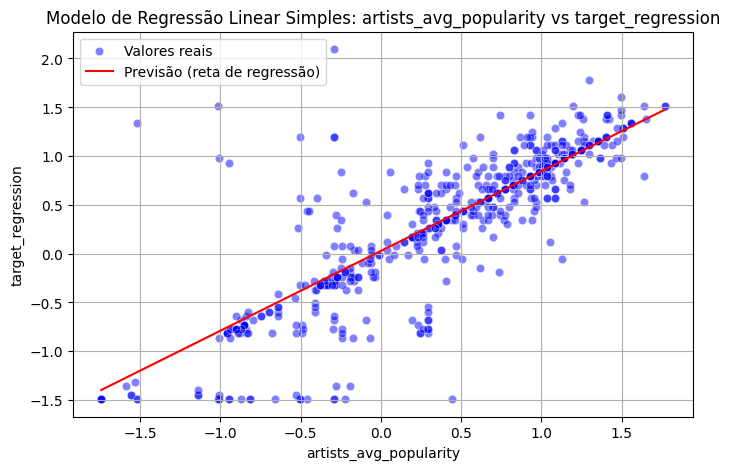

In [297]:
# Divisão treino/teste (para consistência no gráfico)
X_train, X_test, y_train, y_test = train_test_split(df[[best_feature]], df['target_regression'], test_size=0.2, random_state=42)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Relação linear entre artists_avg_popularity e target_regression
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=X_test['artists_avg_popularity'], 
    y=y_test, 
    color='blue', 
    alpha=0.5, 
    label='Valores reais'
)
sns.lineplot(
    x=X_test['artists_avg_popularity'], 
    y=y_pred, 
    color='red', 
    label='Previsão (reta de regressão)'
)
plt.xlabel('artists_avg_popularity')
plt.ylabel('target_regression')
plt.title('Modelo de Regressão Linear Simples: artists_avg_popularity vs target_regression')
plt.legend()
plt.grid(True)
plt.show()

## 3.2 Regressão Linear Múltipla
Quando se fala em **Regressão Linear Múltipla**, refere-se uma **extensão da Regressão Linear Simples**, onde é possível analisar a **relação** entre **uma variável dependente**, neste caso **"target_regression"**, e **duas ou mais variáveis independentes**.
O objetivo deste método é **avaliar** como a **junção de várias features** poderá possivelmente **explicar o comportamento da variável dependente** que está a ser analisada e, ao mesmo tempo, que **influência (positiva ou negativa)** poderá existir no **desempenho do modelo** com a **inclusão de mais variáveis independentes**.
Para isto, é utilizada a seguinte **expressão para demonstrar a relação entre as variáveis utilizadas**:

\\[
y^​=β0​+β1​X1​+β2​X2​+...+βn​Xn​
\\]

onde:

- y é o **valor previsto** da variável dependente,
- β0 é o termo de **interceção**,
- βn é o **coeficiente** atribuído a cada variável independente Xn.

### 3.2.1 Testar um modelo utilizando várias features de áudio
Numa primeira fase, selecionam-se **várias variáveis independentes aleatórias** como, por exemplo:
- **"tempo_vs_genre"**
- **"energy_rank_pct"**
- **"positivity_index"**
- **"acoustics_instrumental"**
- **"focus_factor"**

Permitindo, assim, construir um modelo de **Regressão Linear Múltipla**, tendo como objetivo **avaliar a relação conjunta** destas features com a **variável dependente "target_regression"**, verificando se a **combinação de múltiplas características** de áudio melhora a **capacidade preditiva** do modelo em comparação com a **regressão linear simples** anteriormente analisada.


In [298]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Features selecionadas para o modelo
features = [
    'tempo_vs_genre',
    'energy_rank_pct',
    'positivity_index',
    'acoustics_instrumental',
    'focus_factor'
]

# Criar fórmula para regressão
formula = 'target_regression ~ tempo_vs_genre + energy_rank_pct + positivity_index + acoustics_instrumental + focus_factor'

# Ajustar o modelo
est = smf.ols(formula=formula, data=df).fit()

Após a realização do modelo de **Regressão Linear Múltipla**, para as variáveis enunciadas anteriormente, obteve-se os seguintes resultados:

In [299]:
# Resumo do modelo
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      target_regression   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     20.46
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           3.90e-20
Time:                        11:50:40   Log-Likelihood:                -3430.7
No. Observations:                3000   AIC:                             6873.
Df Residuals:                    2994   BIC:                             6909.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3767      0.019     19.558      0.000       0.339       0.414
tempo_vs_genre            -0.0374      0.017     -2.236      0.025      -0.070      -0.005
energy_rank_pct           -0.0408      0.017     -2.441      0.015      -0.074      -0.008
positivity_index          -0.0672      0.016     -4.107      0.000      -0.099      -0.035
acoustics_instrumental     0.0417      0.028      1.500      0.134      -0.013       0.096
focus_factor              -0.3626      0.052     -6.928      0.000      -0.465      -0.260
==============================================================================
Omnibus:                      174.599   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.419
Skew:                          -0.635   Prob(JB):                     4.08e-45
Kurtosis:                       2.849   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Para garantir ainda que as variáveis **não possuiam fortes correlações** entre elas, criou-se a **matriz de correlação** das mesmas, obtendo-se os seguintes resultados:

In [300]:
# Matriz de correlação entre as variáveis independentes
corr_matrix = df[selected_features].corr()

print("Correlação entre as variáveis independentes:")
display(corr_matrix)


NameError: name 'selected_features' is not defined

Após observar a matriz criada, é possível entender-se que:
- **Não há correlações fortes** entre as variáveis independentes (nenhum valor próximo de 0.8);

- Apenas a relação entre **acoustics_instrumental** e **focus_factor** (0.41) mostra alguma associação moderada;

Assim sendo, isto significa que não existe um grande **fator de correlação** entre as features, o que é ótimo para o modelo de **regressão linear múltipla**.

No entanto, apesar de tudo isto e segundo a análise que foi possível realizar aos resultados obtidos na tabela de resultados do modelo de **Regressão Linear Múltipla (OLS)**, o modelo é **estatisticamente significativo**, mas com **baixo poder de previsão (R² = 0.033)**.

# 4. Classification

## 4.1 Regressão Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Configuração
target_column = 'target_class'  # nome da coluna alvo (classe)
features = [
    'duration_1','duration_2','duration_3','duration_4','duration_5',
    'loudness_level','popularity_level','tempo_class','time_signature',
    'key_mode','artist_song_count','album_freq','movement_index',
    'intensity_level','verbal_density','purity_score','positivity_index',
    'activity_rate','loudness_intensity','happy_dance','acoustics_instrumental',
    'artists_avg_popularity','tempo_vs_genre','energy_rank_pct','loud_energy_ratio',
    'mood_pca','mood_cluster','acoustic_valence_mood_cluster','explicit',
    'signal_strength','mode_indicator','focus_factor','ambient_level','key_sin',
    'key_cos','duration_log','duration_log_z','time_signature_class_boolean',
    'loudness_yeo','is_instrumental','is_dance_hit','temp_zscore','resonance_factor',
    'timbre_index','echo_constant','distorted_movement','signal_power'
]

# Garantir que trabalhamos numa CÓPIA do DataFrame
# Isto evita o SettingWithCopyWarning caso 'df' tenha sido filtrado antes.
df = df.copy(deep=True)

# Remover linhas com dados em falta nas features ou na target
df = df.dropna(subset=features + [target_column]).copy()

# Codificar a variável alvo (se não for numérica)
# Se a coluna alvo for texto/categórica, aplicar LabelEncoder.
y_raw = df[target_column]
if not np.issubdtype(y_raw.dtype, np.number):
    le = LabelEncoder()
    df.loc[:, target_column] = le.fit_transform(y_raw.astype(str))
else:
    le = None  # já é numérica; não precisamos de encoder

# Separar X (features) e y (alvo)
X = df[features]
y = df[target_column].astype(int)

# Dividir em treino/teste (estratificado para manter proporção de classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalização/standardização (ajustar NO TREINO e aplicar no TESTE)
# Isto evita leakeage de informação do conjunto de teste para o treino.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo de Regressão Logística
# Se houver desbalanceamento de classes, pode usar class_weight='balanced'.
logr = LogisticRegression(max_iter=1000)  # ou LogisticRegression(max_iter=1000, class_weight='balanced')
logr.fit(X_train_scaled, y_train)

# Avaliação no conjunto de TESTE (métrica fora da amostra)
y_pred = logr.predict(X_test_scaled)

print("Desempenho da Regressão Logística (conjunto de teste):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Ajustar PCA no TREINO e projetar TREINO/TESTE
pca = PCA(n_components=2, random_state=42)  # n_components=2 para visualização 2D
X_train_pca = pca.fit_transform(X_train_scaled)   # fit no treino
X_test_pca  = pca.transform(X_test_scaled)        # transform no teste

# Escolher o que visualizar
# Aqui mostramos o conjunto de TESTE com as CLASSES PREVISTAS (y_pred),
X_plot = X_test_pca
labels_for_hue = y_pred

# Ver variância explicada pelos 2 componentes
explained = pca.explained_variance_ratio_
print(f"Variância explicada (PCA1, PCA2): {explained[0]:.3f}, {explained[1]:.3f}")

# Gráfico de dispersão colorido pela classe prevista
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_plot[:, 0],
    y=X_plot[:, 1],
    hue=labels_for_hue,
    palette='coolwarm',
    alpha=0.9,
    edgecolor=None
)
plt.title('Regressão Logística — Projeção PCA (conjunto de teste)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Classe Prevista', loc='best')
plt.tight_layout()
plt.show()